# Predict Failure of the Pump

## Step 1 Problem Identification

#### Problem Statement: 
    Detect anomalies in the sensor readings from the pump sensors and predict the next failure of the pump with at least 
    75% accuracy. 
        
#### Context:

    Company XYZ operates a water distribution plant that supplies water to the town of ABC. The water distribution system 
    consists of number of pumps and one of the main pumps failed 7 times last year which resulted in an interruption of 
    water supplly for the households in the town and lead to some serious health problems for number of families. The team 
    of reliability engineers could not see any pattern in the data when the system failed and therefore could not identify 
    the cause of the problem. In order to prevent the same failure from happening in the future again, the XYZ company 
    wants to be able to detect the potential issue in advance and be able to control and mitigate the risk of failure. 
    There is one particular pump that is the most important and is equiped with 51 sensors which measure different types of 
    functionalities of the pump. 

#### Criteria For Success:
    A model that predicts with at least 75% accuracy and generalizes on other samples without underfitting or overfitting.

#### Scope of the Solution Space:
    The scope of this project is limited to developing a model that detects anomalies and predicts failures of water pumps 
    based on raw sensor data. The model will not be intended to be used for detecting credit frauds or any other use cases 
    outside the scope of this project. 

#### Contraints:
    Data set is limited to the sensor readings from a single pump hence may not be the best representation of all the 
    pumps. Computing power might become a constraint for effectively visualizing all 51 features at the same time.

#### Stakeholders:
    Jaime Lannister - Maintenance Manager of the XYZ Company

#### Data:
    The data set is sourced from https://www.kaggle.com/nphantawee/pump-sensor-data and consists of 51 numerical features 
    and a categorical label. 51 numerical features contain raw sensor readings from 51 different sensors that are used to 
    do condition monitoring of the pump.The label contains string values that represent normal, broken and recovering 
    operational conditions of the pump. The data set represents 219,521 readings from 51 sensors.   

#### Solution Approach: 

    I will solve this problem by developing a classification model that detects anomalies from the sensor readings and 
    accordingly predicts the potential failure of the pump. To do that, I will first apply an appropriate unsupervised 
    learning techniques to undertake dimensionality reduction for the effective visualization of the data and EDA. Then I 
    will train classification models and will use cross-validation to evaluate their performance to select the best model.

#### Project Deliverables: 
    The deliverables include an app that takes certain features in certain format from a pump and predicts next failure, as 
    well as a slide deck that explains how the app was developed and verified. In addition, all the code will be available 
    in a Jupyter notebook in a GitHub repo for each step of the project.

## Step 2 Data Wrangling

## Step 3 Exploratory Data Analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

#### 3.1: Load the data 

In [2]:
os.getcwd()

'C:\\Users\\Bauyrjan.Jyenis\\Capstone2_Project\\capstone\\notebooks'

In [3]:
path = 'C:\\Users\\Bauyrjan.Jyenis\\Capstone2_Project\\capstone\\data\\processed'
os.chdir(path)

In [4]:
# import the tidy data from the Step #2
df=pd.read_csv('output_step_2.csv')

In [5]:
df.shape

(219521, 54)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219521 entries, 0 to 219520
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      219521 non-null  int64  
 1   sensor_00       219521 non-null  float64
 2   sensor_01       219521 non-null  float64
 3   sensor_02       219521 non-null  float64
 4   sensor_03       219521 non-null  float64
 5   sensor_04       219521 non-null  float64
 6   sensor_05       219521 non-null  float64
 7   sensor_06       219521 non-null  float64
 8   sensor_07       219521 non-null  float64
 9   sensor_08       219521 non-null  float64
 10  sensor_09       219521 non-null  float64
 11  sensor_10       219521 non-null  float64
 12  sensor_11       219521 non-null  float64
 13  sensor_12       219521 non-null  float64
 14  sensor_13       219521 non-null  float64
 15  sensor_14       219521 non-null  float64
 16  sensor_16       219521 non-null  float64
 17  sensor_17 

#### 3.2: Data cleaning (as needed) before performing an EDA

In [7]:
del df['Unnamed: 0']

In [8]:
# Let's convert the data type of timestamp column to datatime format
df['date'] = pd.to_datetime(df['date'])

#### 3.3: Quantitative EDA

In [9]:
# Summary statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_00,219521.0,2.371961,0.403223,0.000000,2.417187,2.455556,2.499826,2.549016
sensor_01,219521.0,47.590015,3.299447,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,219521.0,50.863387,3.668355,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,219521.0,43.746718,2.417856,31.640620,42.838539,44.227428,45.225693,48.220490
sensor_04,219521.0,590.629672,144.127709,2.798032,626.620400,632.754600,637.615723,800.000000
sensor_05,219521.0,73.397642,17.304487,0.000000,69.982320,75.578420,80.918750,99.999880
sensor_06,219521.0,13.500351,2.143252,0.014468,13.346350,13.628470,14.539930,22.251160
sensor_07,219521.0,15.841237,2.176726,0.000000,15.856480,16.167530,16.427950,23.596640
sensor_08,219521.0,15.198273,2.015901,0.028935,15.183740,15.451390,15.697340,24.348960
sensor_09,219521.0,14.796988,2.072470,0.000000,15.010130,15.082470,15.118630,25.000000


In [51]:
df['machine_status'].value_counts()

NORMAL        205067
RECOVERING     14447
BROKEN             7
Name: machine_status, dtype: int64

__Decision #1__: Extract the sensor readings from the normal, broken and recovering conditions into seperate data frames to prepare for the visualization of trends

In [10]:
normal = df[df['machine_status']=='NORMAL']
broken = df[df['machine_status']=='BROKEN']
recovering = df[df['machine_status']=='RECOVERING']

In [11]:
normal = normal.set_index('date')
broken = broken.set_index('date')
recovering = recovering.set_index('date')

In [11]:
# Summary Statistics of the sensor readings from the pump during its normal state
normal.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_00,205067.0,2.420376,0.242826,0.000000,2.444734,2.456539,2.499826,2.549016
sensor_01,205067.0,48.179641,2.242105,0.000000,46.701390,48.263890,49.565970,56.727430
sensor_02,205067.0,51.634030,1.877815,37.413190,50.651040,51.736111,52.821180,56.032990
sensor_03,205067.0,44.161637,1.666095,33.289930,43.142361,44.314240,45.355900,48.220490
sensor_04,205067.0,625.683187,50.905890,2.798032,628.240700,633.333400,637.963013,800.000000
sensor_05,205067.0,75.389470,9.386479,0.000000,70.505870,75.648860,80.606930,99.999880
sensor_06,205067.0,13.865700,0.866221,0.014468,13.382520,13.679110,14.568870,15.964990
sensor_07,205067.0,16.165741,0.601023,0.028935,15.950520,16.167530,16.427950,19.133390
sensor_08,205067.0,15.477257,0.588898,0.028935,15.183740,15.494790,15.697340,19.538480
sensor_09,205067.0,15.086105,0.573605,0.007234,15.053530,15.082470,15.118630,18.988710


In [13]:
# Summary Statistics of the sensor readings from the pump during its broken state
broken.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_00,7.0,1.194188,1.096684,0.000000,0.182986,1.093982,2.288802,2.321759
sensor_01,7.0,45.969742,4.167754,40.190970,43.836805,45.833332,47.374135,53.342010
sensor_02,7.0,50.837052,3.115010,45.225690,49.587671,52.734370,52.864585,52.994790
sensor_03,7.0,42.931546,1.682742,40.190971,42.122393,43.402775,43.663194,45.355900
sensor_04,7.0,334.672200,173.963706,200.115738,201.947327,206.038757,460.251724,612.152800
sensor_05,7.0,45.351953,31.315537,0.000000,25.597100,60.301060,66.724005,72.520400
sensor_06,7.0,9.818328,5.761857,0.028935,7.277200,12.304690,13.827400,14.185470
sensor_07,7.0,13.731811,6.073307,0.036169,15.212670,15.914350,16.427955,16.890910
sensor_08,7.0,13.294684,5.904074,0.036169,14.666520,15.183740,15.820315,16.869210
sensor_09,7.0,12.788318,5.660497,0.007234,14.330150,15.053530,15.100550,15.596060


In [28]:
# Summary Statistics of the sensor readings from the pump during recovering state
recovering.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_00,14447.0,1.685314,1.061935,0.000000,0.109201,2.372221,2.372221,2.372221
sensor_01,14447.0,39.221386,4.368632,32.204860,35.373264,38.671880,41.059020,53.559020
sensor_02,14447.0,39.924556,5.131497,33.159720,36.024303,38.715270,42.230900,53.559020
sensor_03,14447.0,37.857565,3.507324,31.640620,34.852427,37.717014,40.538190,46.701390
sensor_04,14447.0,93.188850,117.999992,2.798032,3.336227,3.567708,203.029495,611.689800
sensor_05,14447.0,45.138360,49.435780,0.000000,0.000000,0.000000,99.999878,99.999880
sensor_06,14447.0,8.316205,5.509911,0.014468,0.028935,10.098380,13.501537,22.251160
sensor_07,14447.0,11.236107,6.644661,0.000000,9.852430,15.082465,15.843152,23.596640
sensor_08,14447.0,11.239179,6.327273,0.028935,10.098380,12.811050,15.200721,24.348960
sensor_09,14447.0,10.694104,6.523891,0.000000,8.796296,14.799210,14.799210,25.000000


__Decision #2__: Now I want to visualize mean, standard deviation, median, and the range of the readings for each of the operating conditions of the pump (normal vs broken vs recovering) on the same graph in different colors to look for trends

In [12]:
# Extract mean and standard deviation of the sensor readings from the pump when in normal operational state
means_normal=normal.mean(axis=0)
std_normal = normal.std(axis=0)

In [13]:
# Extract mean and standard deviation of the sensor readings from the pump when in broken state
means_broken = broken.mean(axis=0)
std_broken = broken.std(axis=0)

In [14]:
# Extract mean and standard deviation of the sensor readings from the pump when in recovering state
means_recovering = recovering.mean(axis=0)
std_recovering = recovering.std(axis=0)

In [15]:
# Extract median of the sensor readings from the pump for each operational condition
median_normal = normal.median(axis=0)
median_broken = broken.median(axis=0)
median_recovering = recovering.median(axis=0)

In [16]:
# Calculate range of the readings for each sensor for the each operational condition of the pump
range_broken = broken.drop('machine_status', 1).max(axis=0) - broken.drop('machine_status', 1).min(axis=0)
range_normal = normal.drop('machine_status', 1).max(axis=0) - normal.drop('machine_status', 1).min(axis=0)
range_recovering = recovering.drop('machine_status', 1).max(axis=0) - recovering.drop('machine_status', 1).min(axis=0)

#### 3.4: Graphical EDA

__Standard Deviations__: Below I plot the standard deviations of the readings for each state of the pump and see how different the standard deviations are from one condition to another i.e. normal vs broken state.

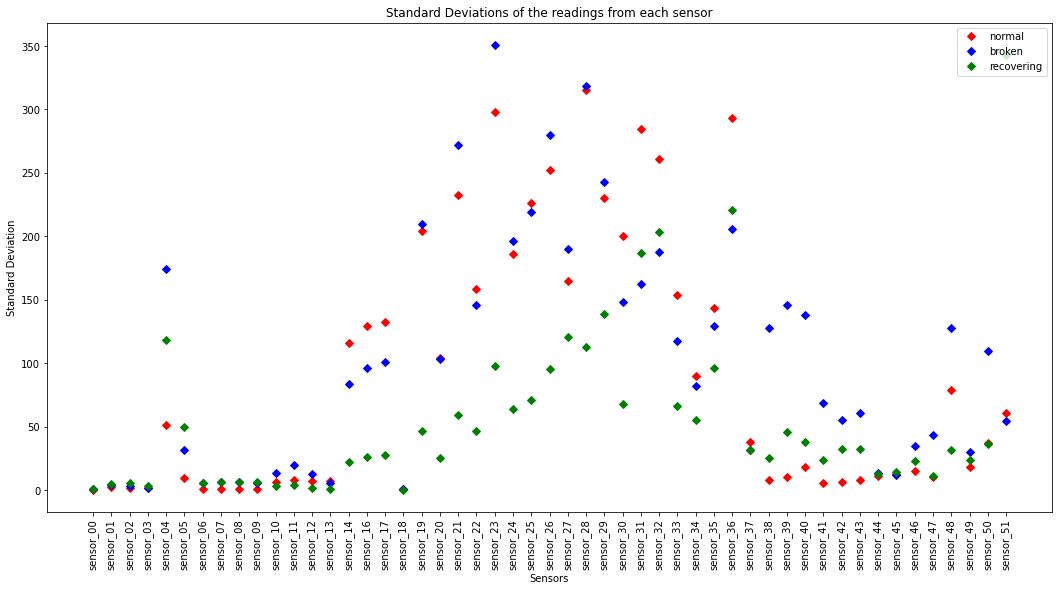

In [22]:
# Plot Standard Deviations of the sensor readings for each state of the pump
_ = plt.figure(figsize=(18,9))
_ = plt.plot(std_normal, color='red', marker='D', label='normal', linestyle='none')
_ = plt.plot(std_broken, color='blue', marker='D', label='broken', linestyle='none')
_ = plt.plot(std_recovering, color='green', marker='D', label='recovering', linestyle='none')
_ = plt.xlabel('Sensors')
_ = plt.ylabel('Standard Deviation')
_ = plt.title('Standard Deviations of the readings from each sensor')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=90)
plt.show()

There are red and blue dots that are closer together, I assume that means the pump is broken not because of them.
There are sensors with much lower standard deviation which signifies much stable operations and gets much bigger standard deviation when the pump is broken (notice their corresponding blue dots on the same vertical line, i.e. sensor_04).Strangely, some sensors have higher standard deviation when the pump is functioning normally and then gets much lower standard deviation when the pump is broken (i.e. sensor_36)

__Means__: Below I plot the means of the readings for each state of the pump and see how different the means are from one condition to another i.e. normal vs broken state.

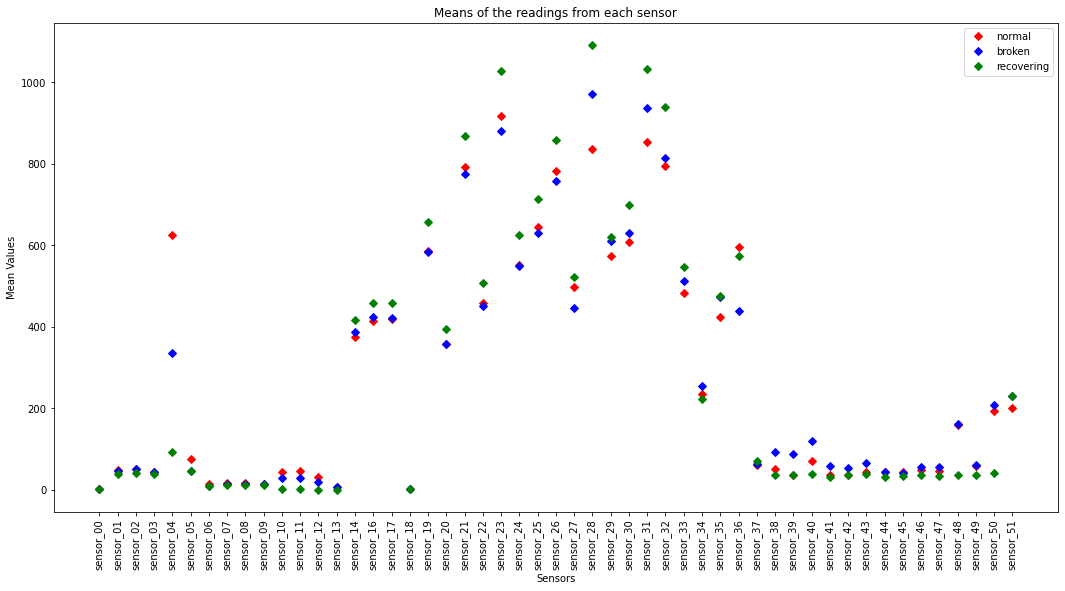

In [23]:
# Plot Mean values of the sensor readings for each state of the pump
_ = plt.figure(figsize=(18,9))
_ = plt.plot(means_normal, marker='D', color='red', label='normal', linestyle='none')
_ = plt.plot(means_broken, marker='D', color='blue', label='broken', linestyle='none')
_ = plt.plot(means_recovering, marker='D', color='green', label='recovering', linestyle='none')
_ = plt.xlabel('Sensors')
_ = plt.ylabel('Mean Values')
_ = plt.title('Means of the readings from each sensor')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=90)
plt.show()

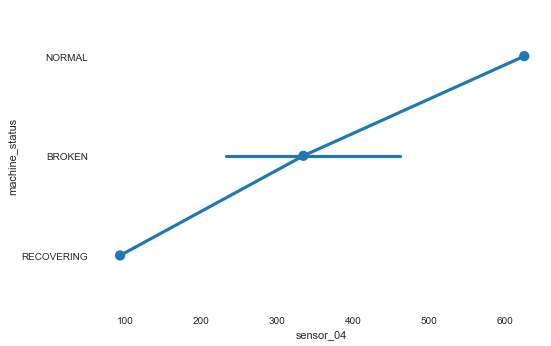

In [30]:
# Now I want to look at the means of this sensor closer by point plot for each state of the pump
ax = sns.pointplot(x='sensor_04', y='machine_status', data=df)

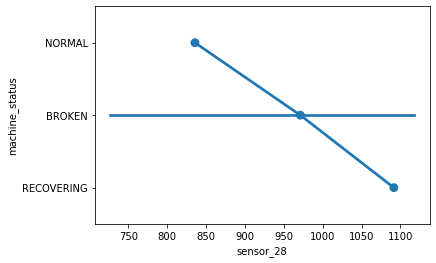

In [31]:
# Now I want to look at the means of this sensor closer by point plot for each state of the pump
ax = sns.pointplot(x='sensor_28', y='machine_status', data=df)

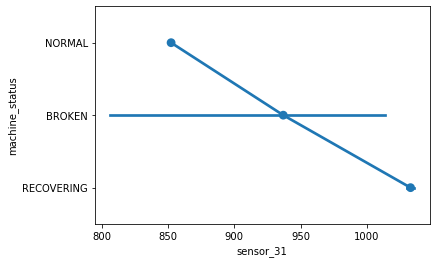

In [32]:
# Now I want to look at the means of this sensor closer by point plot for each state of the pump
ax = sns.pointplot(x='sensor_31', y='machine_status', data=df)

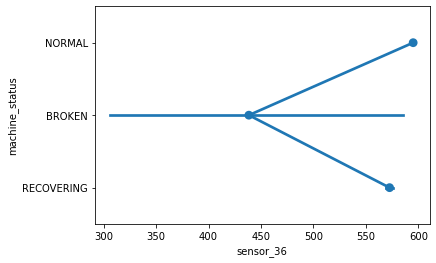

In [26]:
# Now I want to look at the means of this sensor closer by point plot for each state of the pump
ax = sns.pointplot(x='sensor_36', y='machine_status', data=df)

As seen from above, the sensors 04, 28, 31 and 36 have the greatest changes in their means when the pump is in normal vs broken state. I will closely investigate this during feature selection before the modeling step of this project.

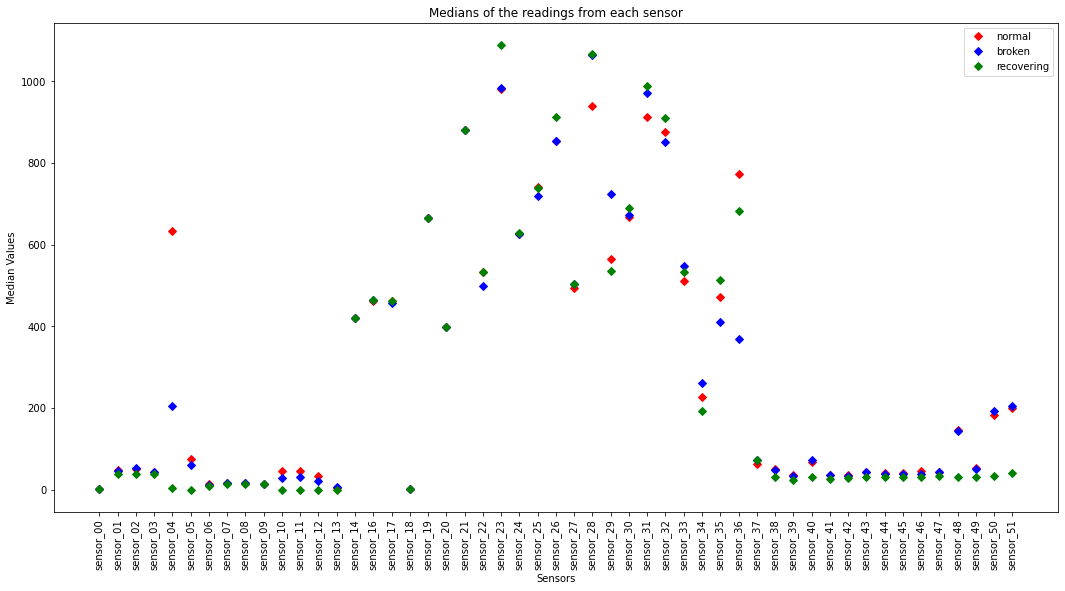

In [24]:
# Plot Median of the sensor readings for each state of the pump
_ = plt.figure(figsize=(18,9))
_ = plt.plot(median_normal, marker='D', color='red', label='normal', linestyle='none')
_ = plt.plot(median_broken, marker='D', color='blue', label='broken', linestyle='none')
_ = plt.plot(median_recovering, marker='D', color='green', label='recovering', linestyle='none')
_ = plt.xlabel('Sensors')
_ = plt.ylabel('Median Values')
_ = plt.title('Medians of the readings from each sensor')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=90)
plt.show()

I notice similar trend from the readings of the sensors 04, 28, 31 and 36 from the above plot as well.

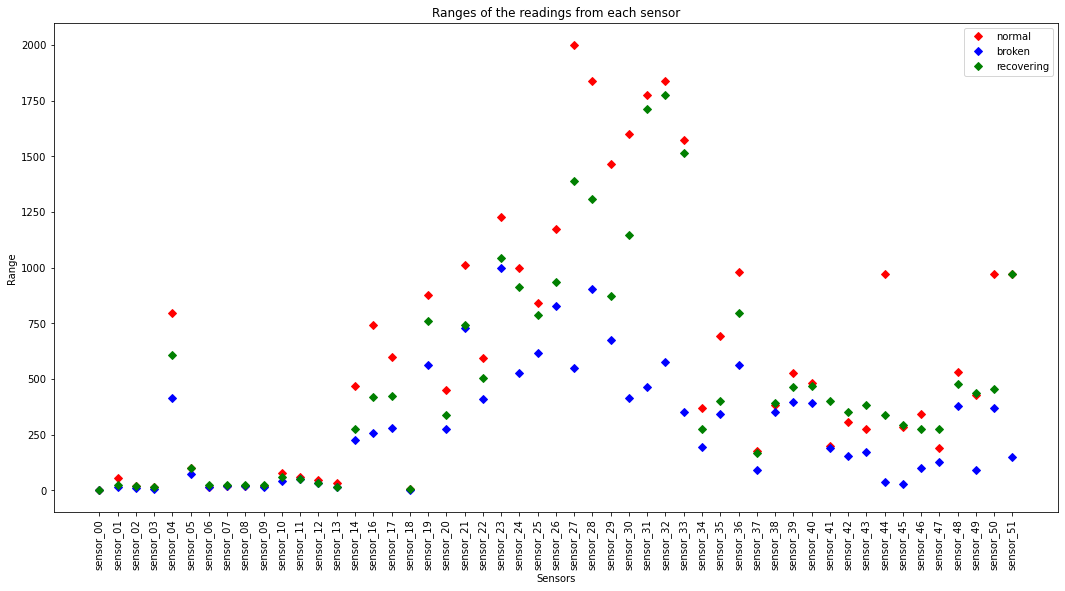

In [25]:
# Plot Range (max value - min value) of the sensor readings for each state of the pump
_ = plt.figure(figsize=(18,9))
_ = plt.plot(range_normal, marker='D', color='red', label='normal', linestyle='none')
_ = plt.plot(range_broken, marker='D', color='blue', label='broken', linestyle='none')
_ = plt.plot(range_recovering, marker='D', color='green', label='recovering', linestyle='none')
_ = plt.xlabel('Sensors')
_ = plt.ylabel('Range')
_ = plt.title('Ranges of the readings from each sensor')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=90)
plt.show()

The above plot that shows the ranges (max-min) for each of the sensors for each state of the pump and it definitely shows big difference in other sensors that just the four sensors mentioned in other plots above. For the sensors which have red and blue dots closer together, I assume that they don't impact the operational state of the pump. In other words, the pump will not be broken because of them. 

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_00


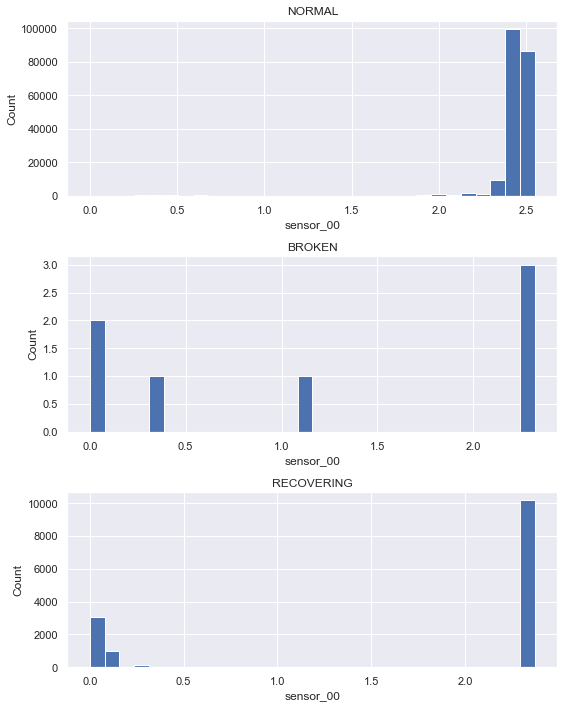

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_01


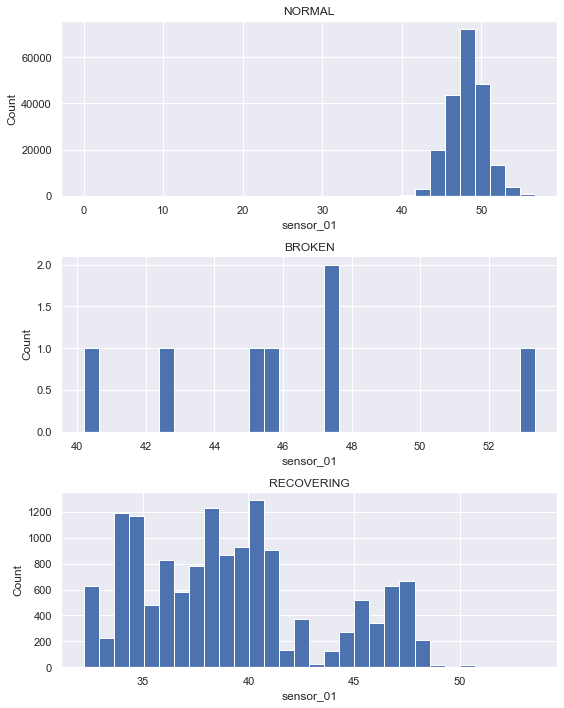

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_02


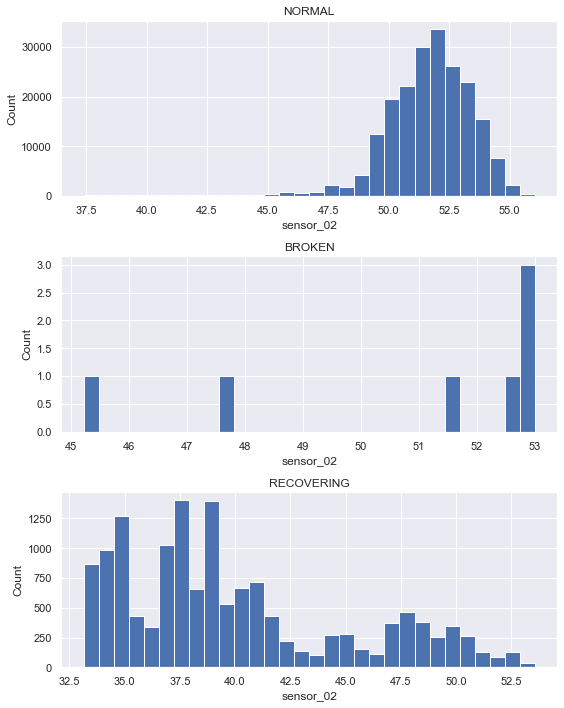

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_03


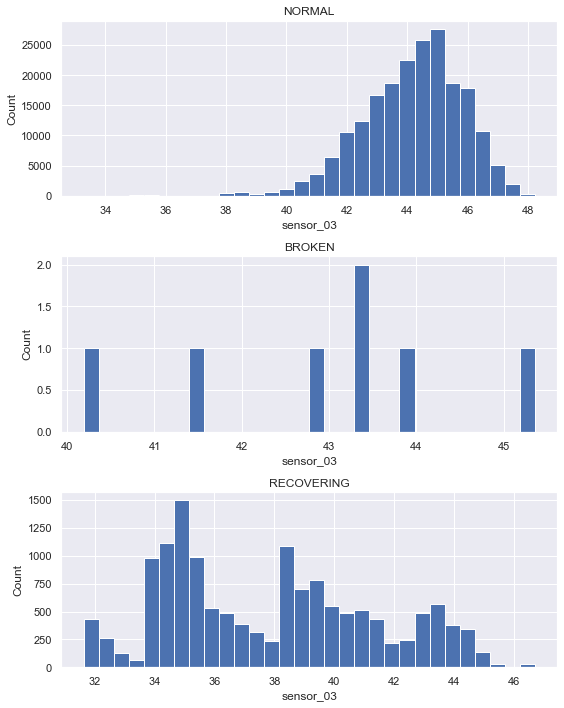

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_04


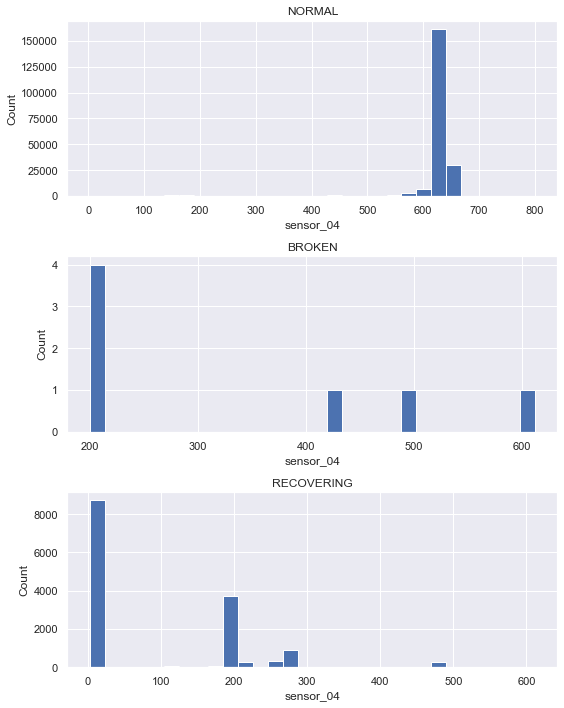

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_05


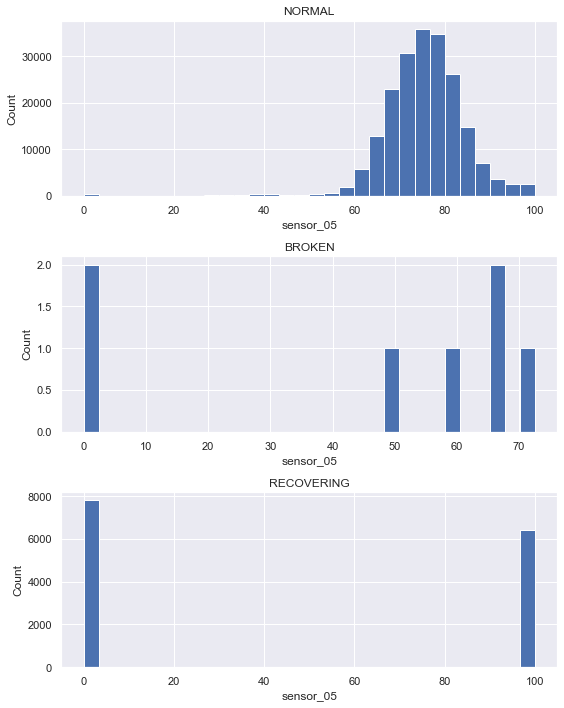

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_06


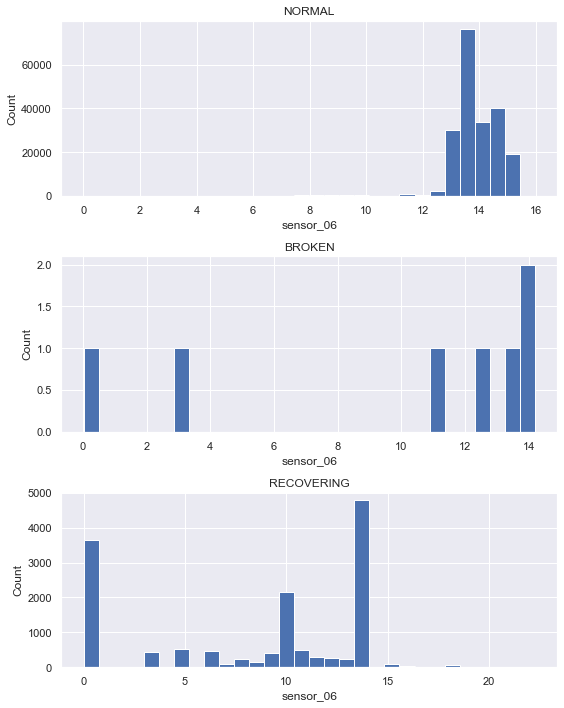

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_07


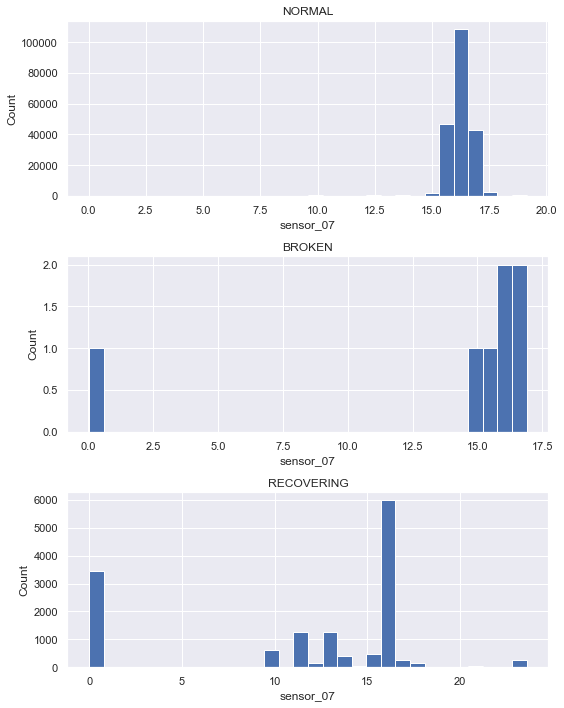

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_08


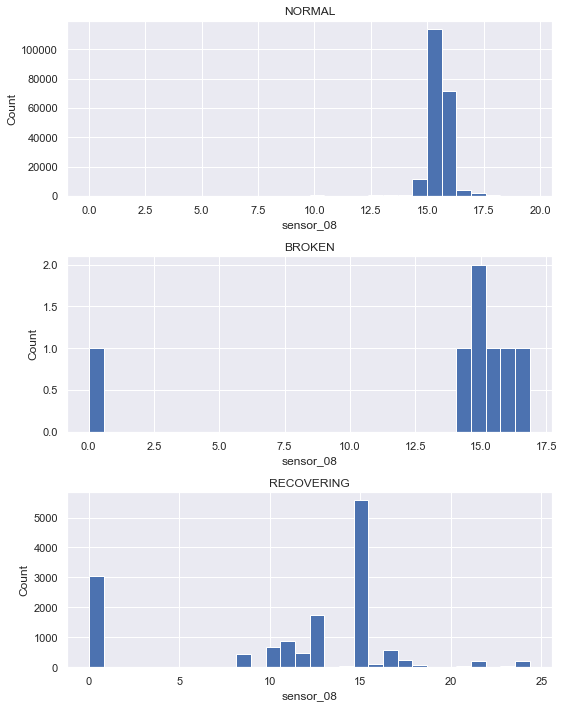

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_09


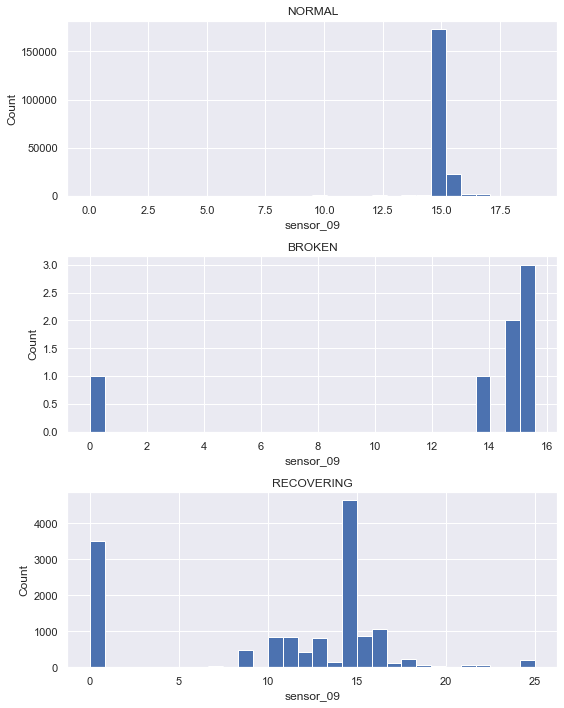

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_10


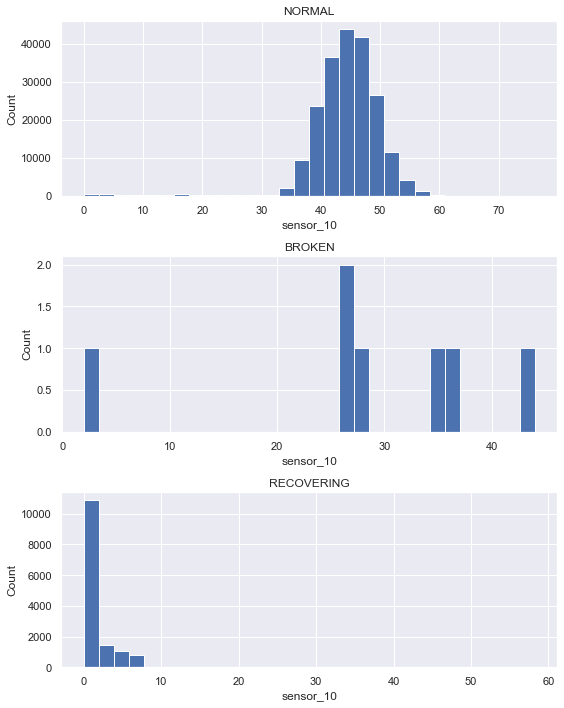

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_11


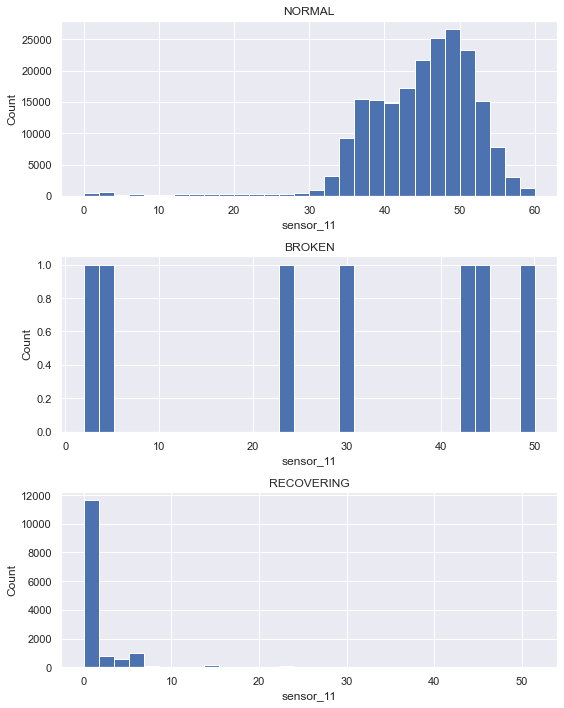

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_12


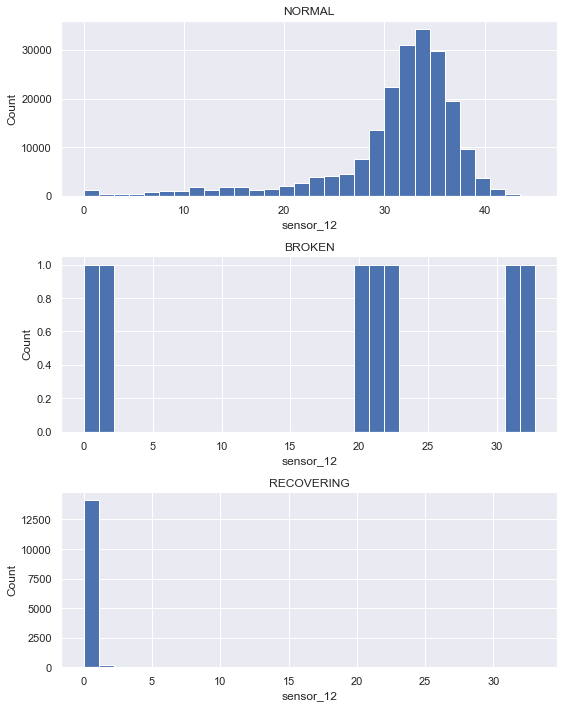

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_13


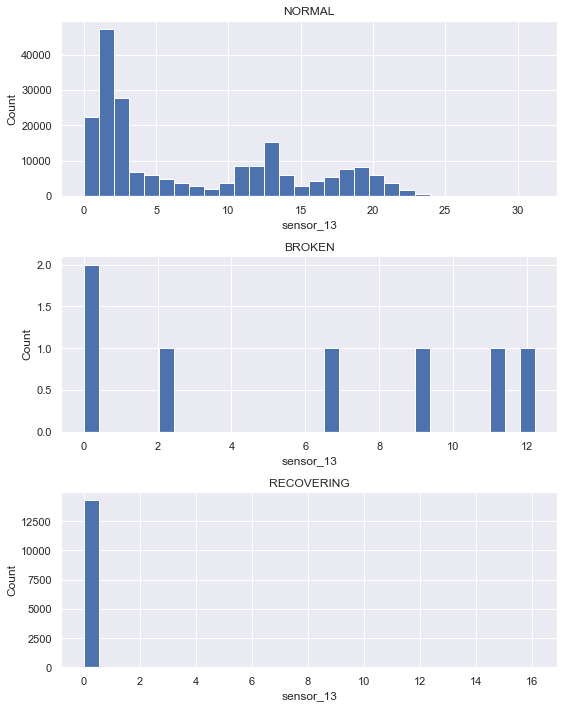

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_14


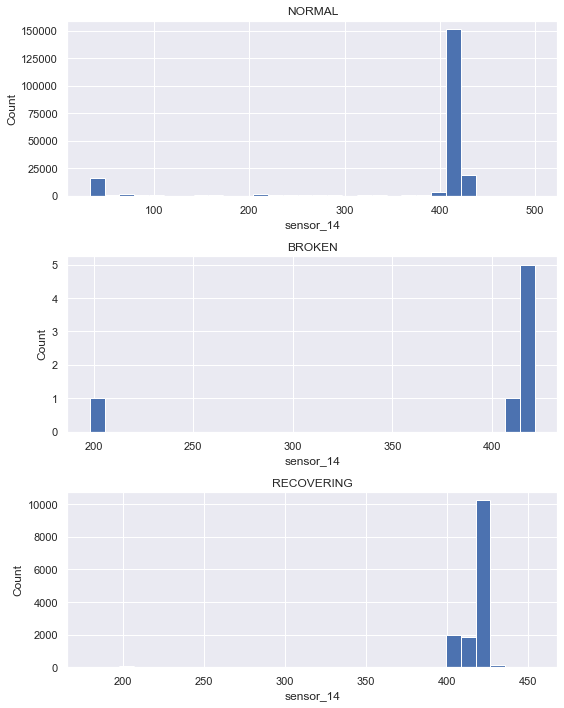

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_16


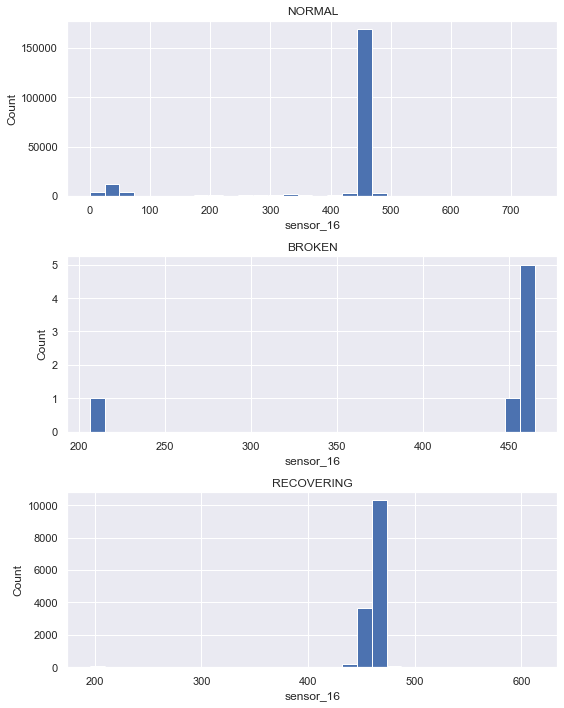

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_17


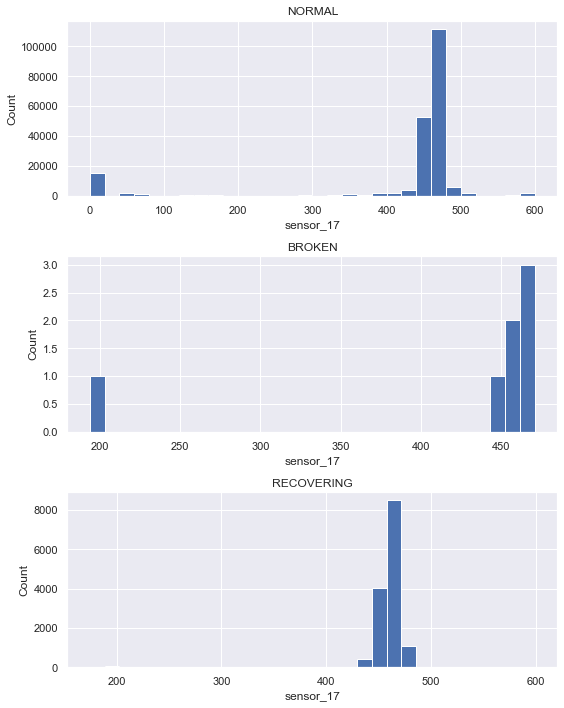

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_18


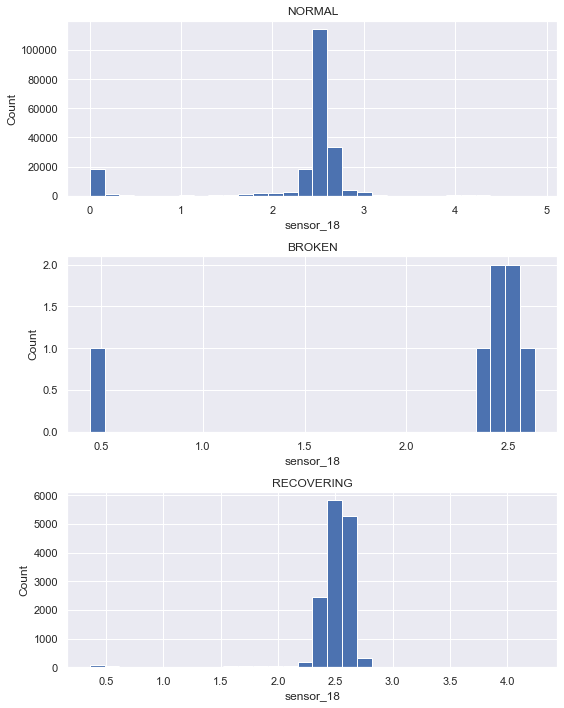

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_19


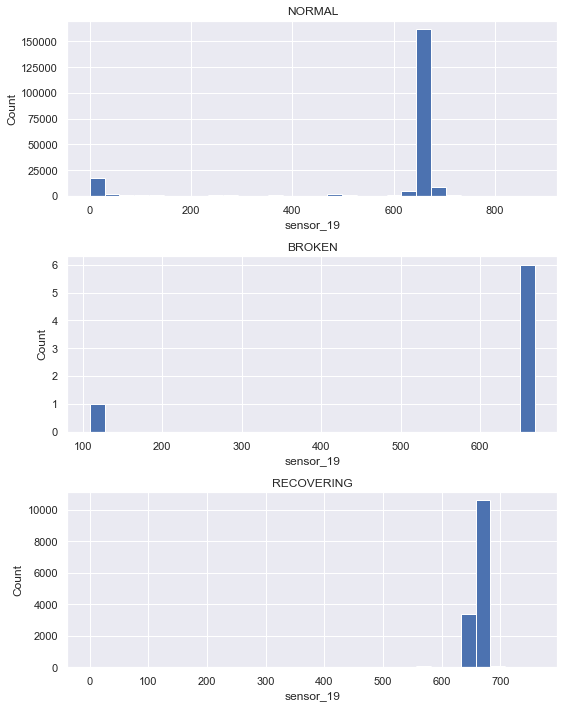

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_20


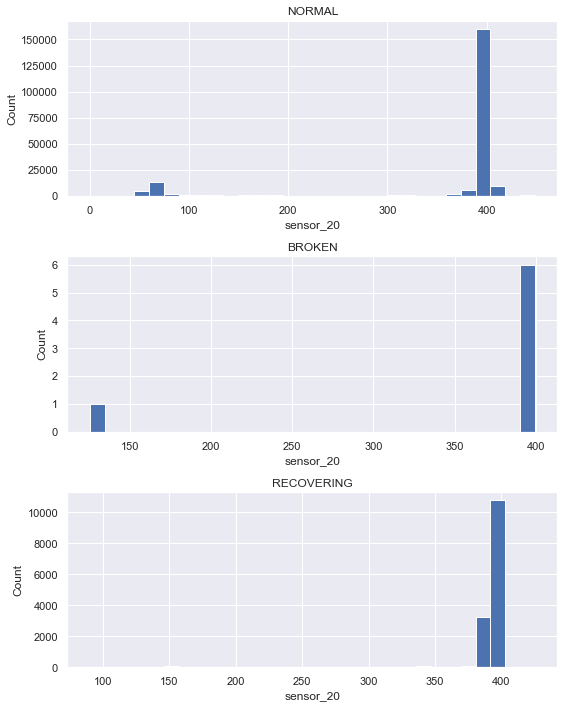

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_21


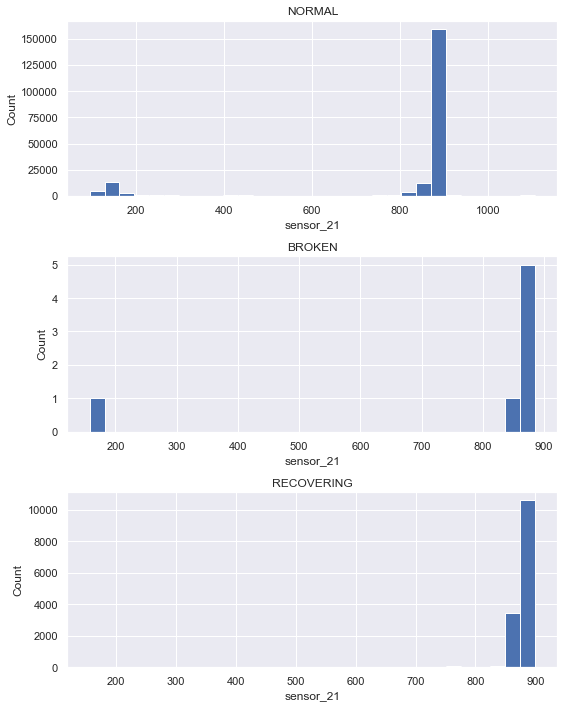

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_22


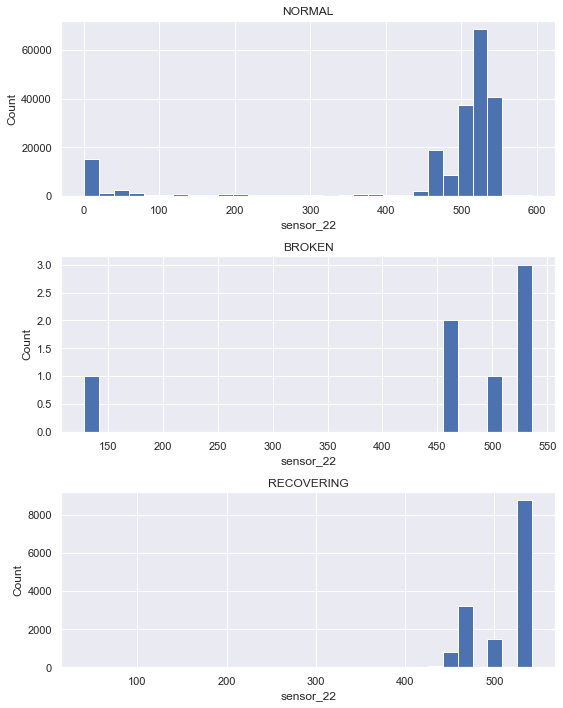

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_23


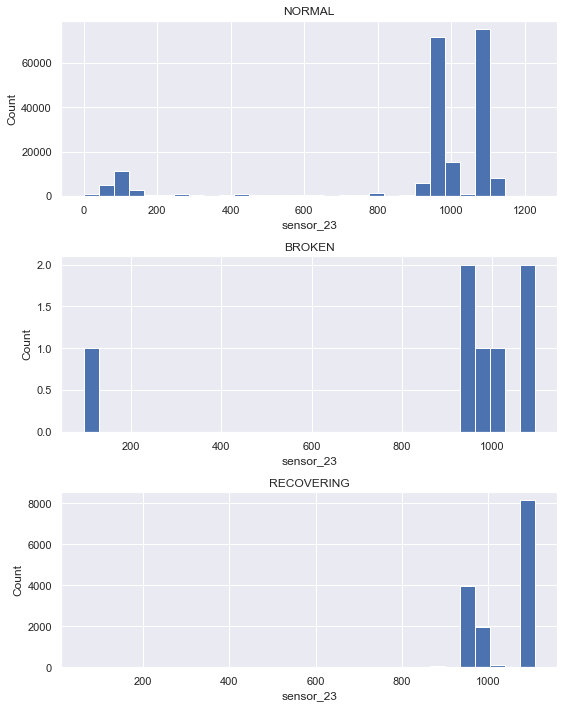

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_24


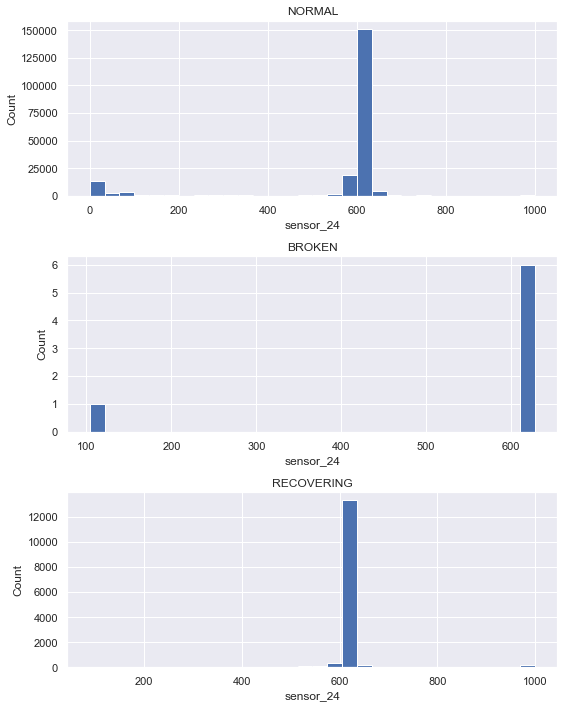

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_25


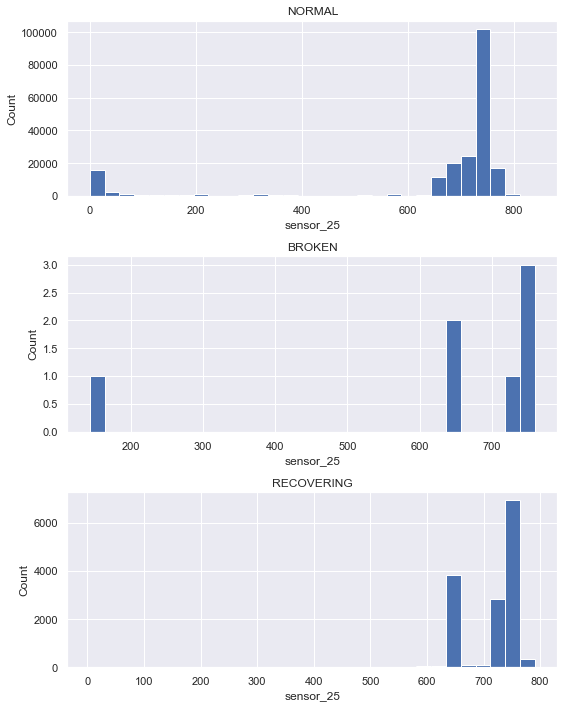

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_26


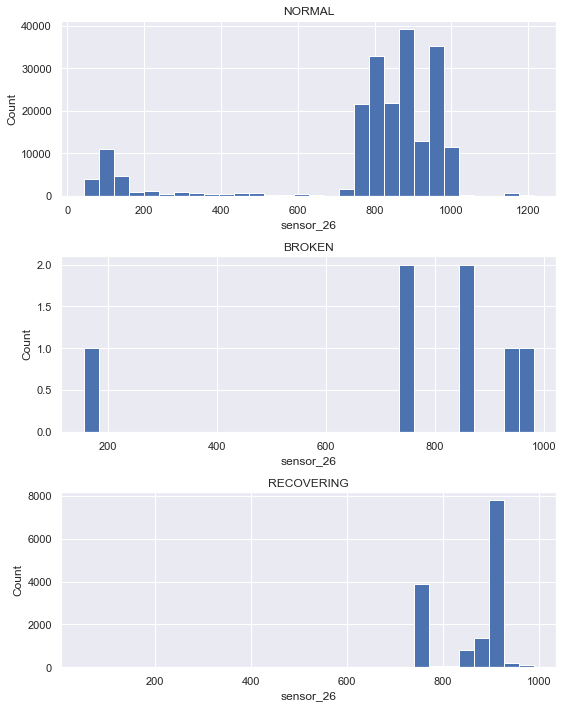

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_27


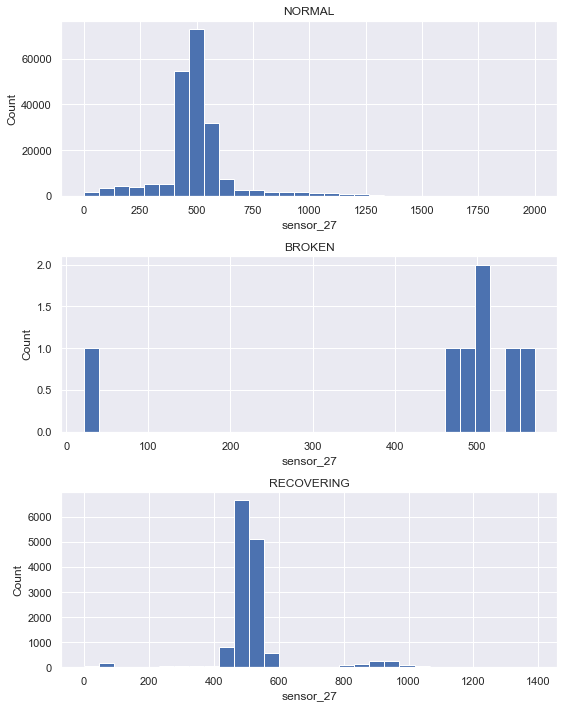

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_28


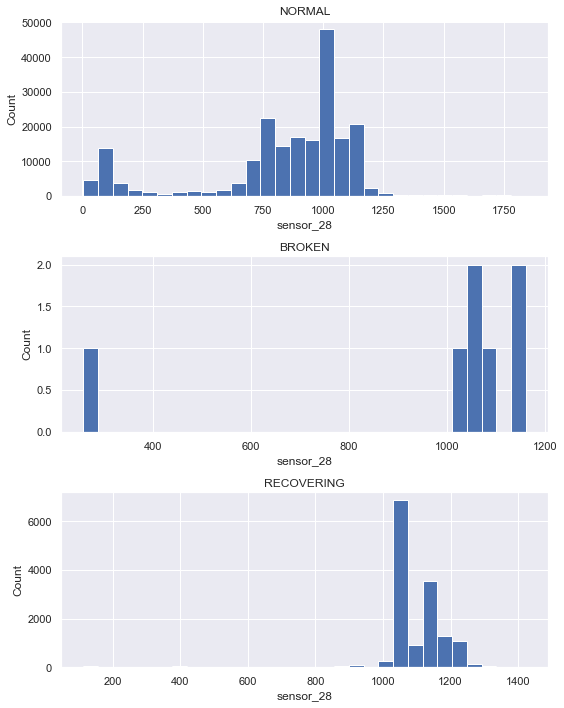

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_29


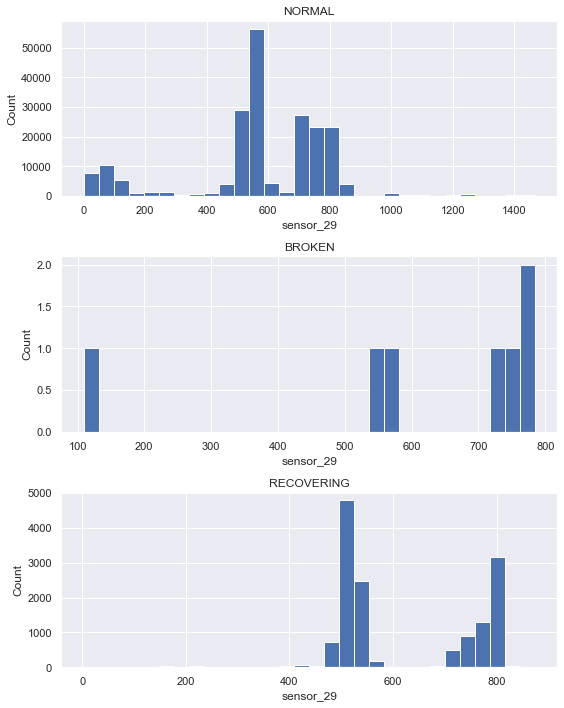

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_30


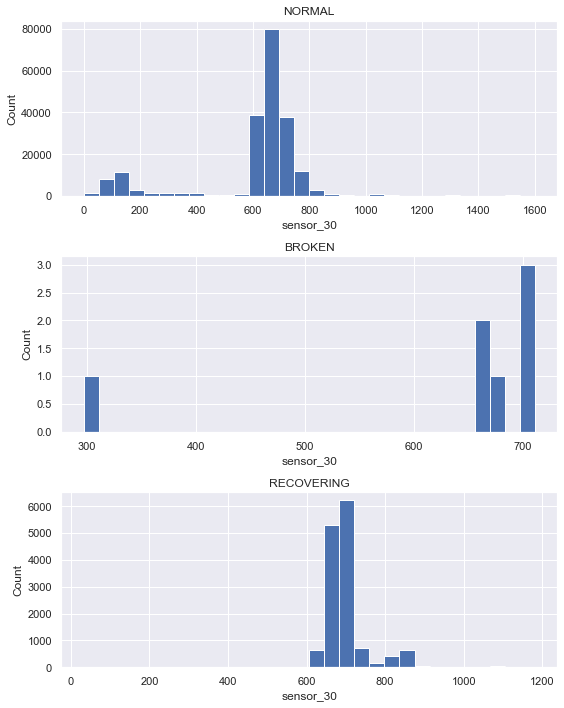

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_31


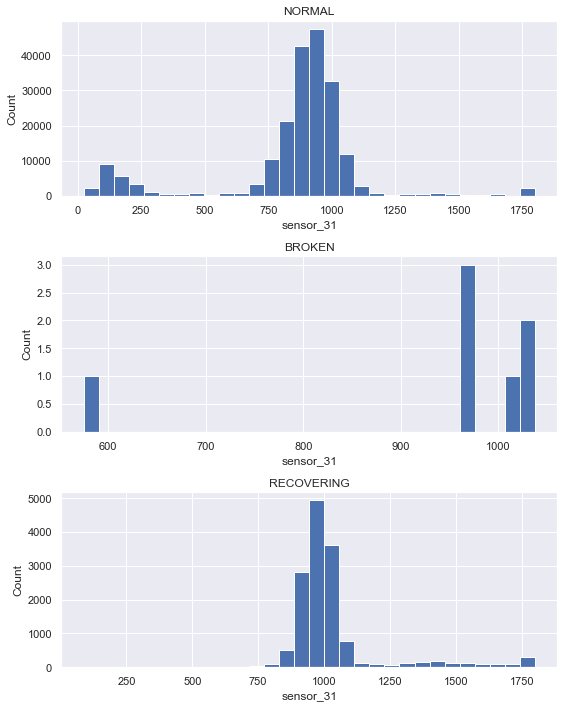

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_32


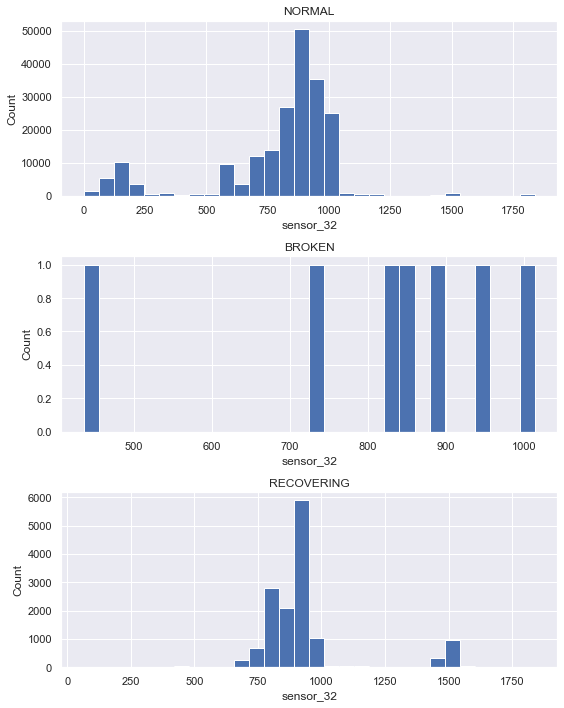

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_33


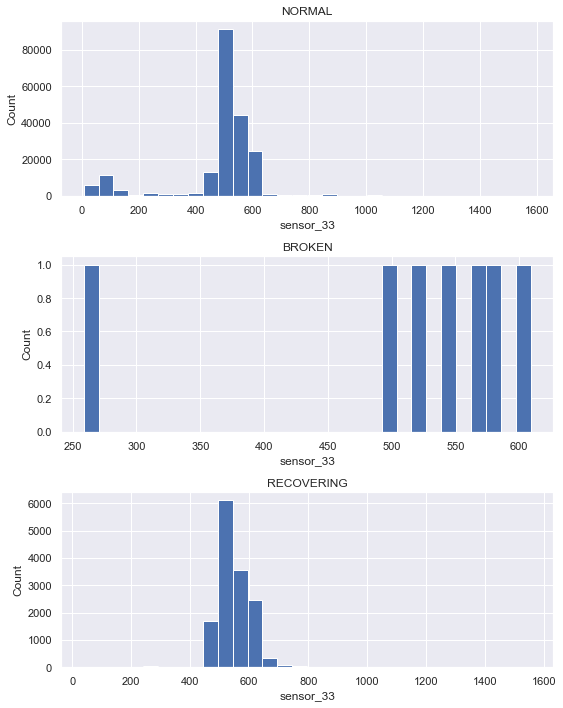

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_34


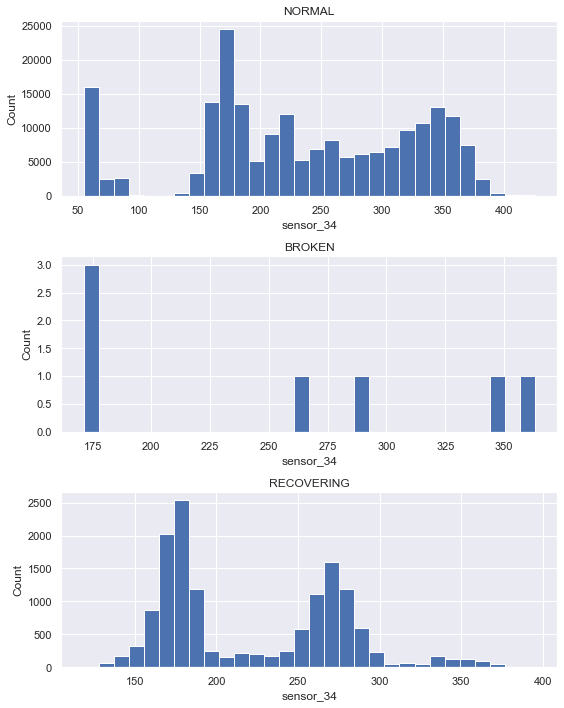

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_35


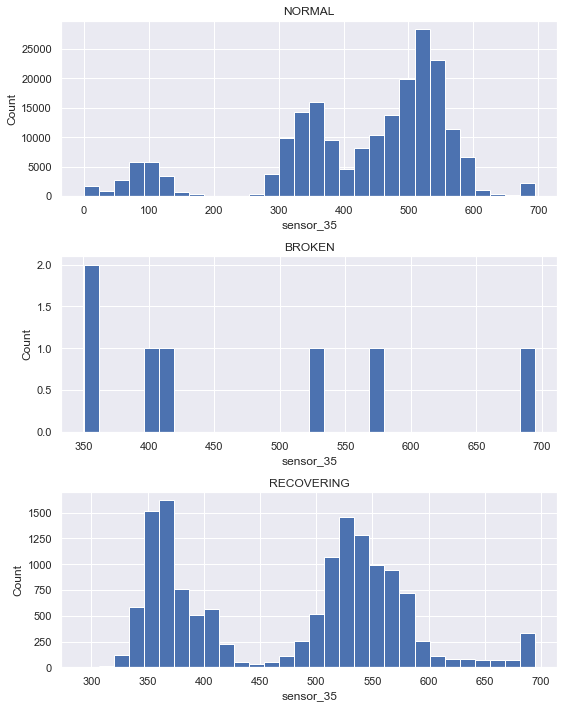

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_36


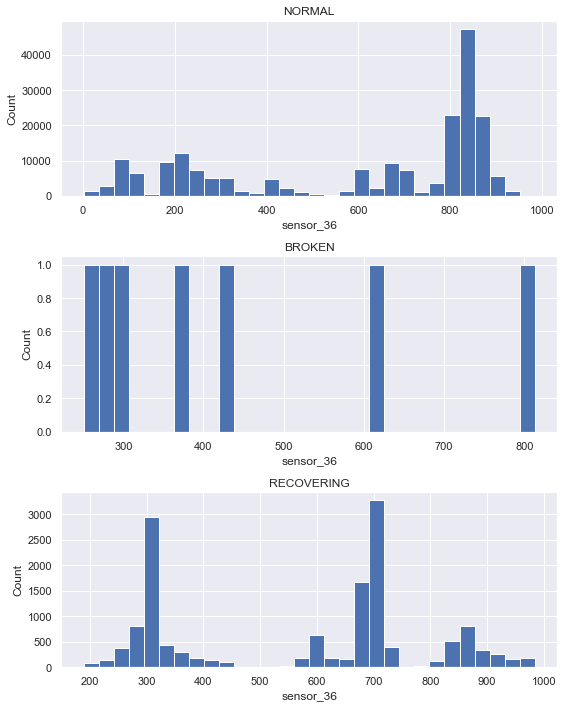

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_37


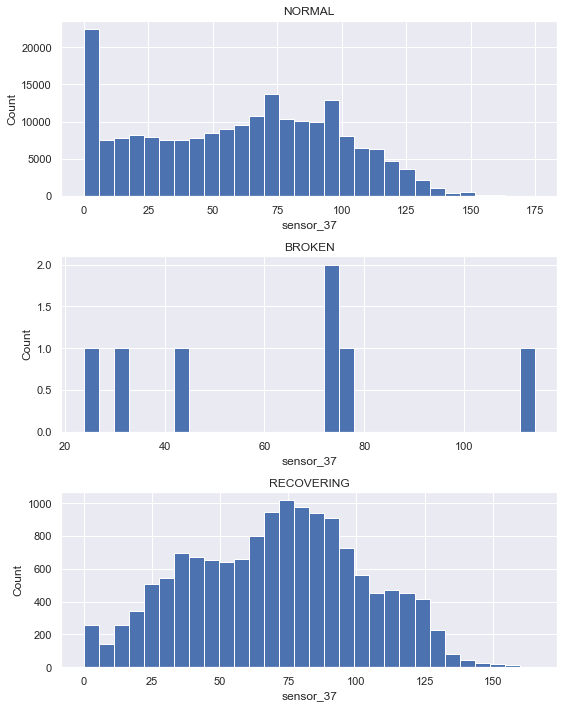

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_38


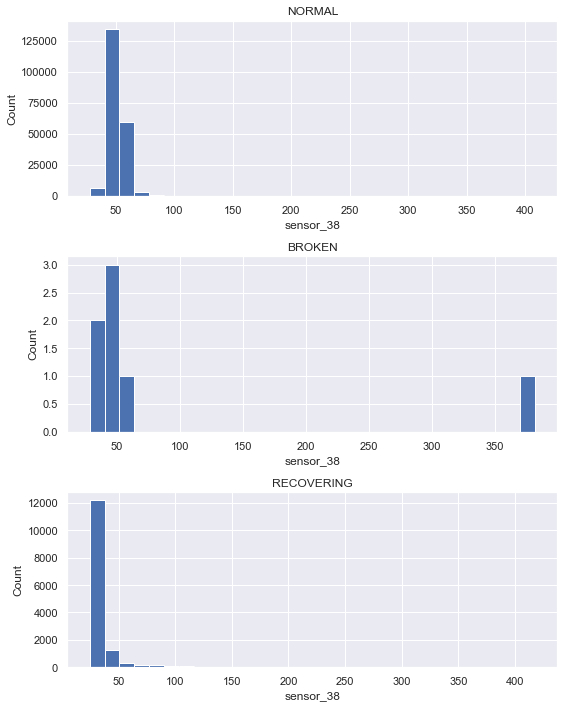

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_39


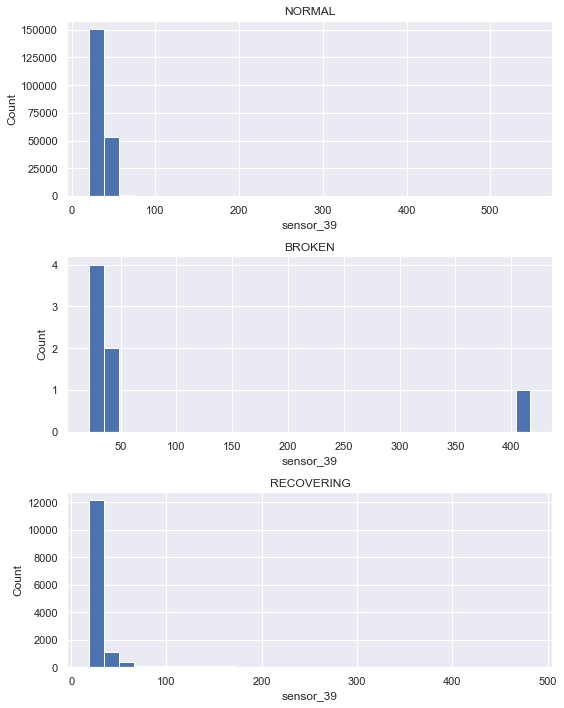

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_40


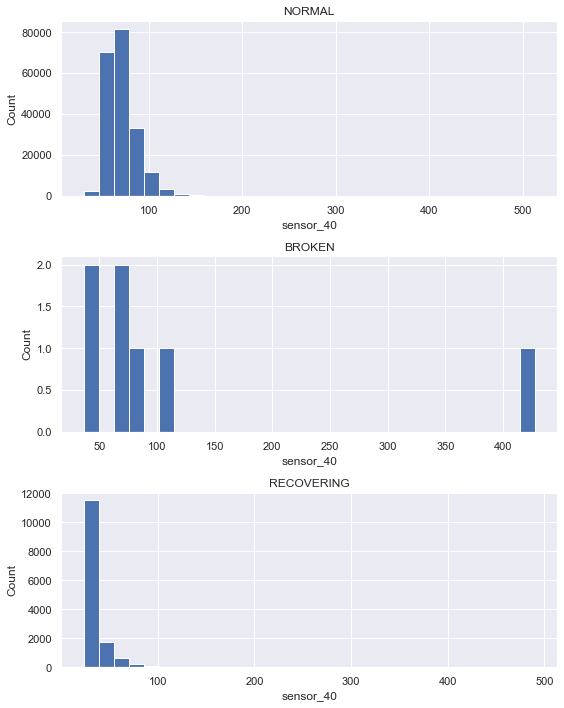

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_41


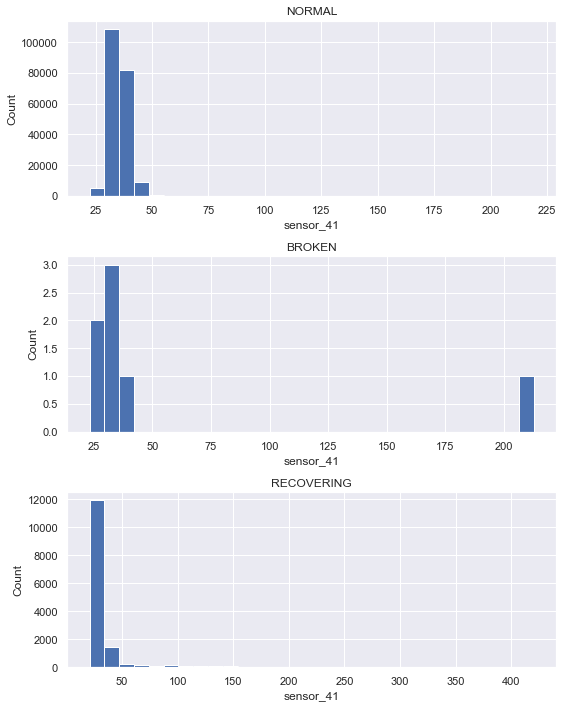

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_42


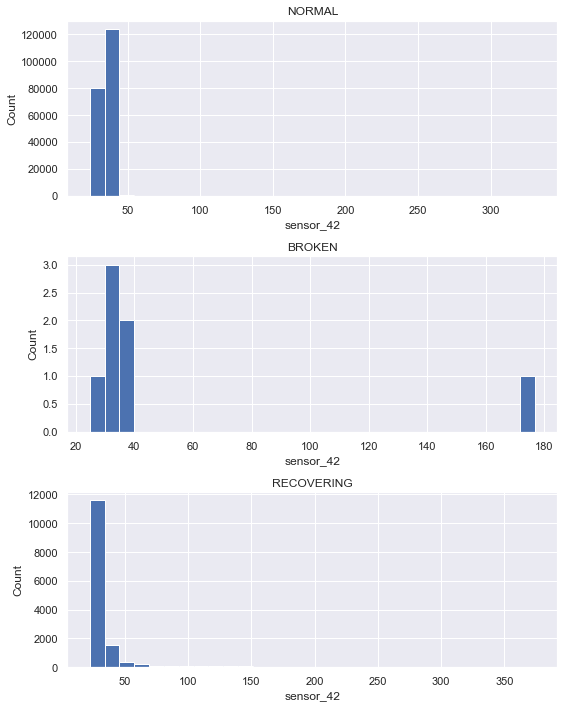

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_43


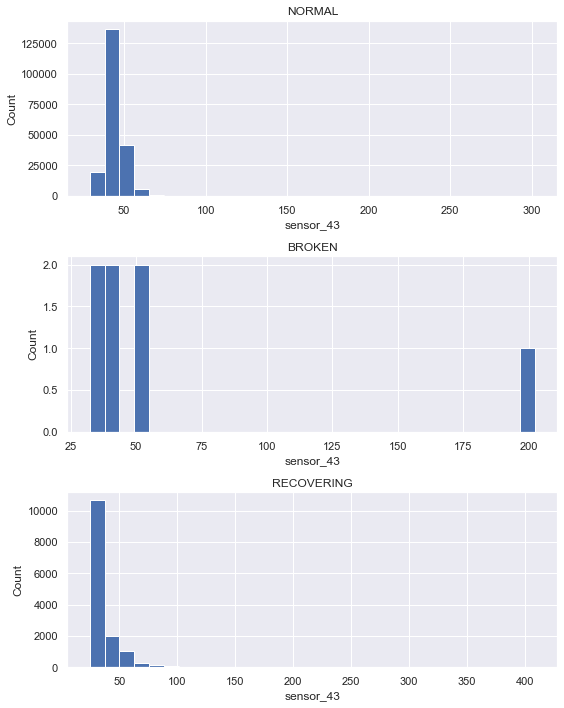

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_44


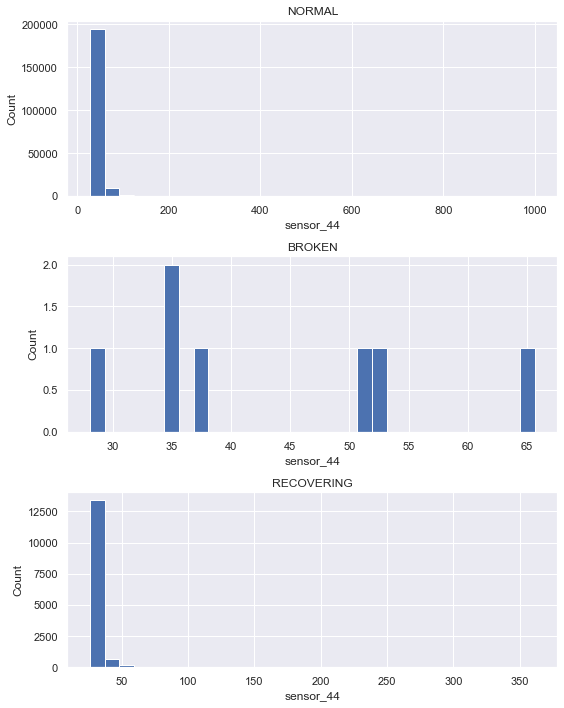

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_45


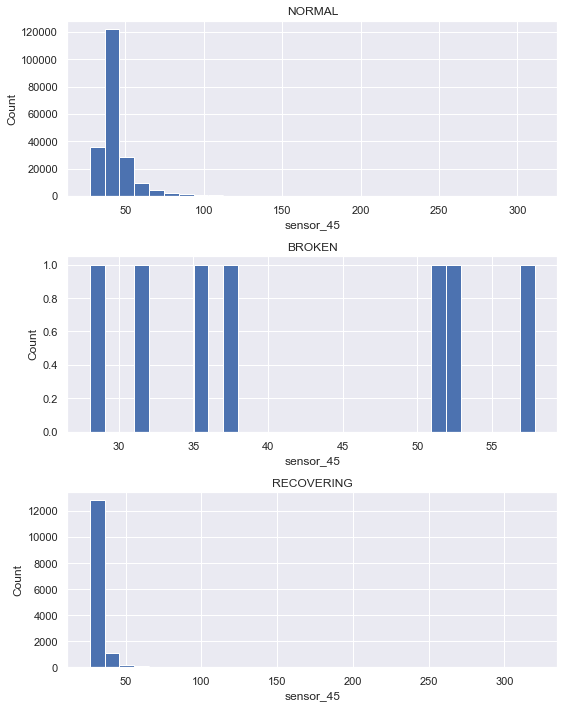

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_46


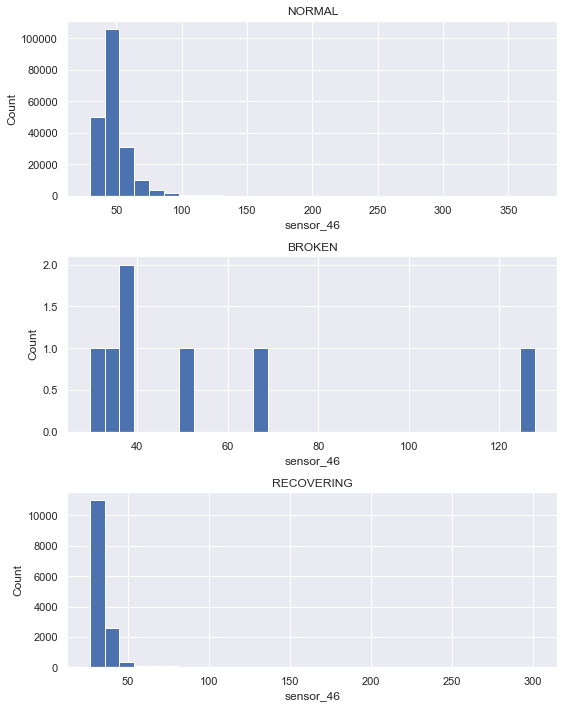

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_47


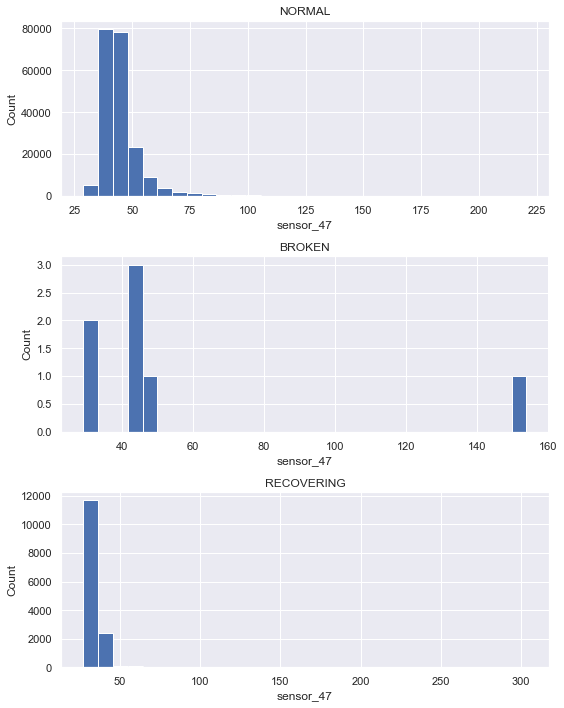

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_48


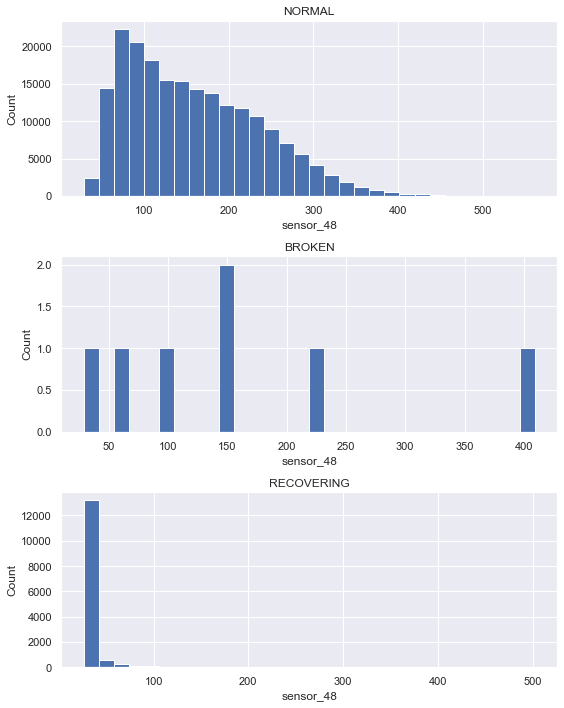

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_49


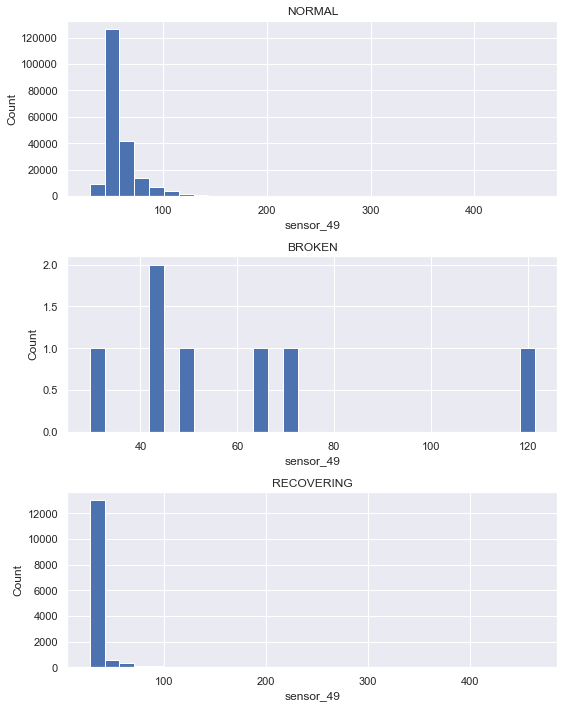

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_50


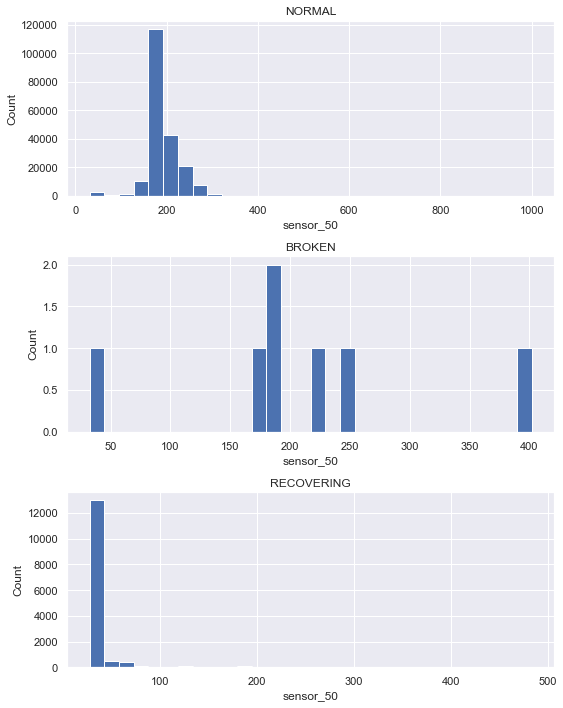

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_51


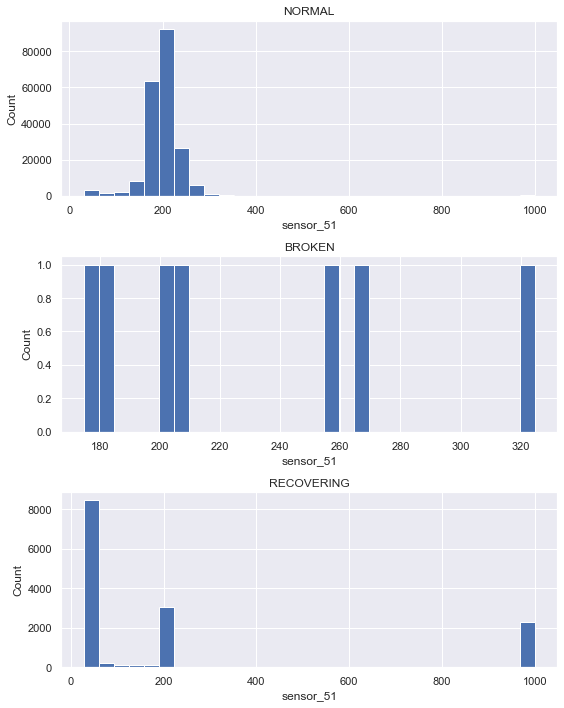

In [87]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
for i, col in enumerate(df_adj.columns):
    print(color.BOLD + "Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor: " + color.END, col)
    sns.set()
    plt.figure(figsize=(8,10)) 
    plt.subplot(3,1, 1)
    plt.hist(normal[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('NORMAL')
    plt.subplot(3,1, 2)
    sns.set()
    plt.hist(broken[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('BROKEN')
    plt.subplot(3,1, 3)
    sns.set()
    plt.hist(recovering[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('RECOVERING')
    plt.tight_layout()
    plt.show()

__ECDF plots__: Let's plot and see ECDF of the sensor readings for each state of the pump

In [88]:
# Compute ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

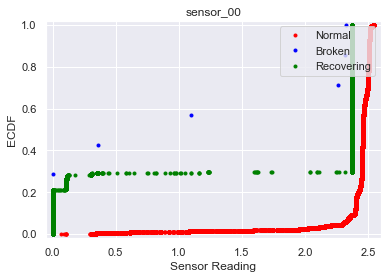

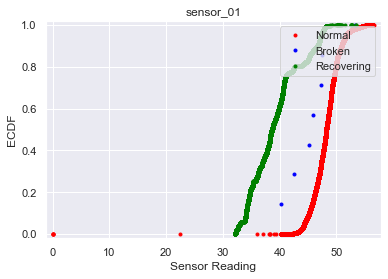

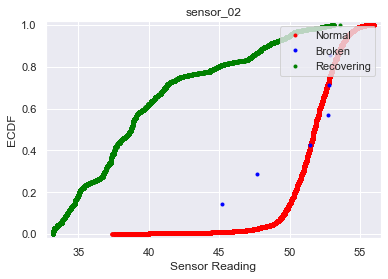

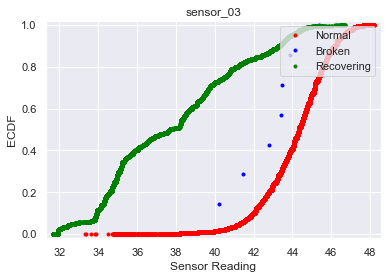

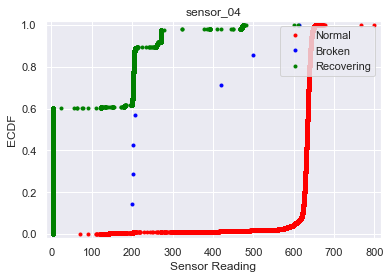

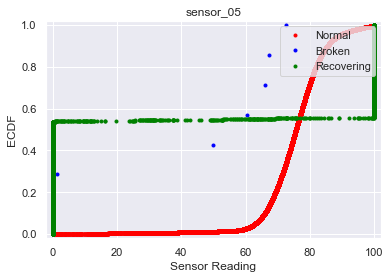

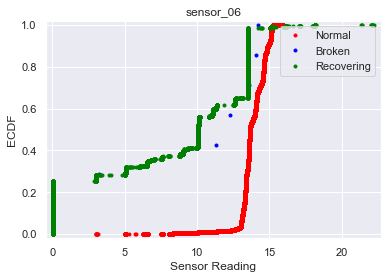

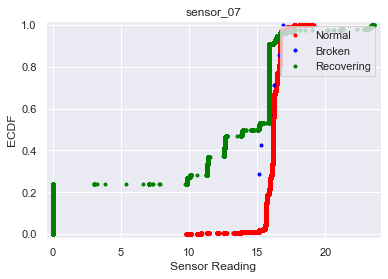

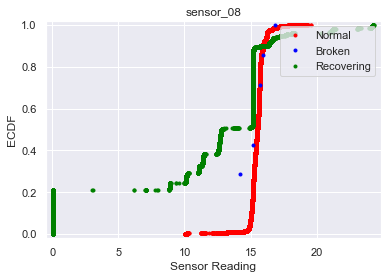

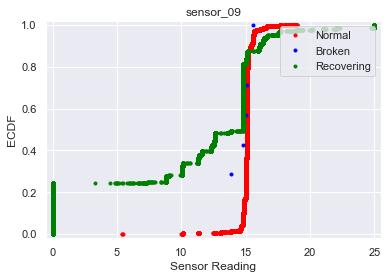

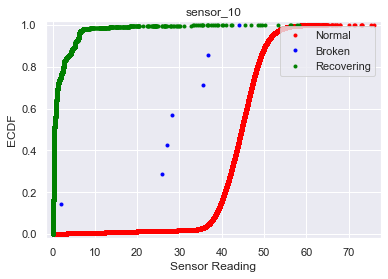

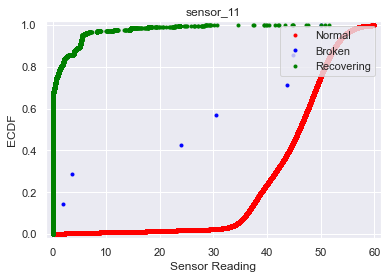

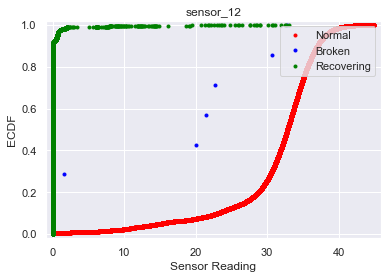

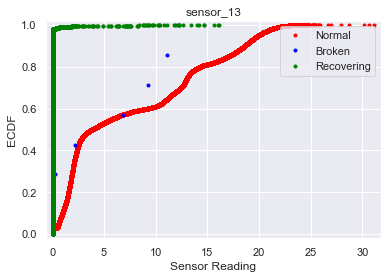

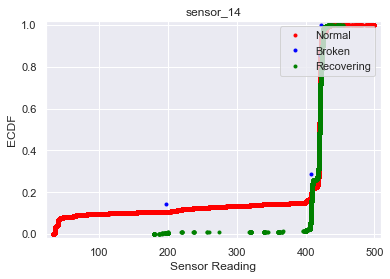

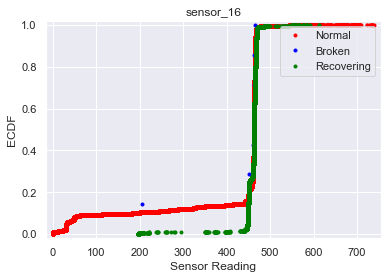

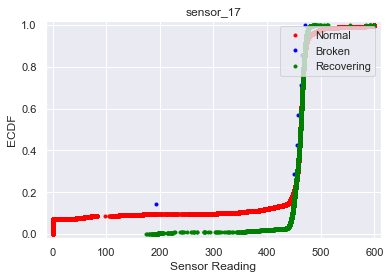

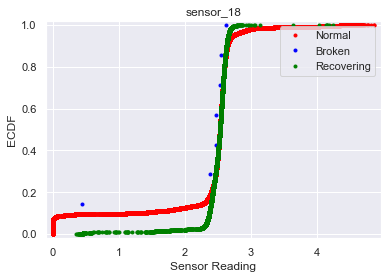

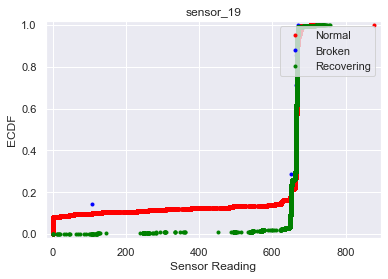

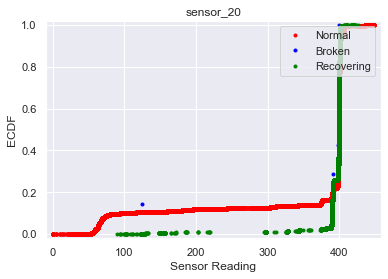

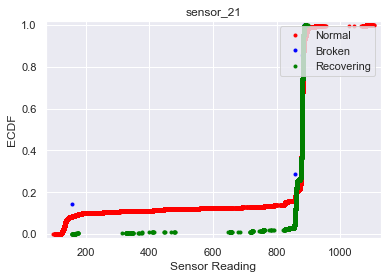

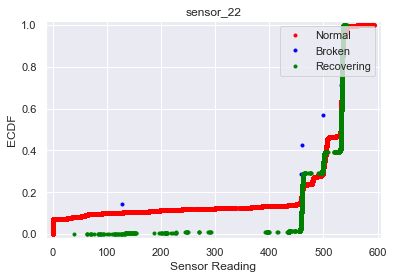

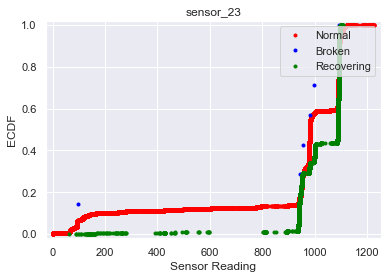

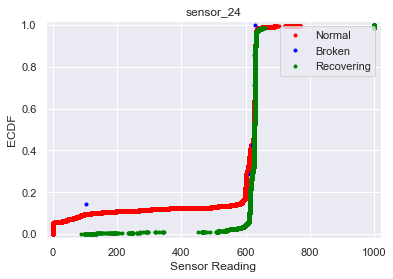

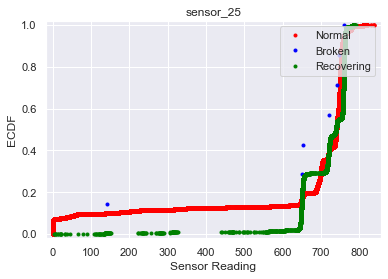

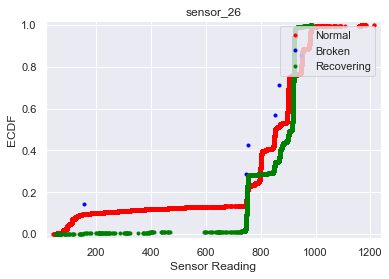

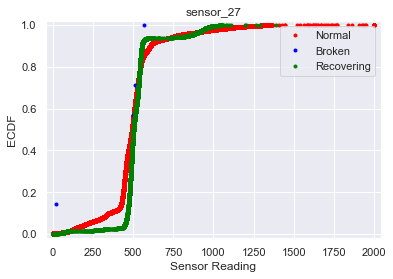

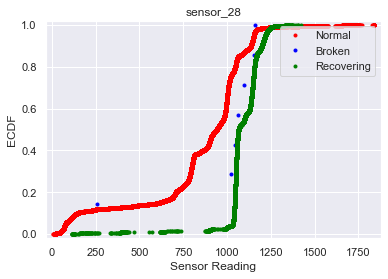

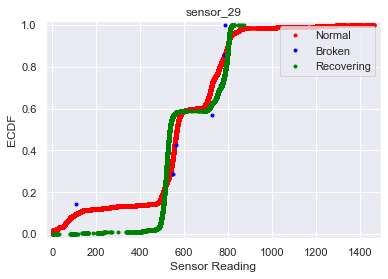

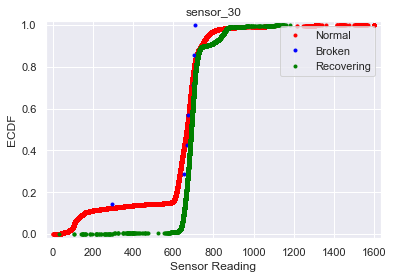

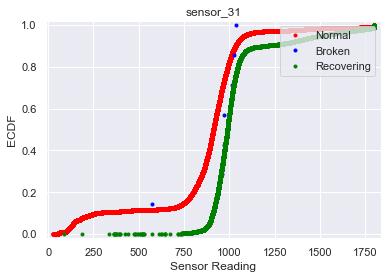

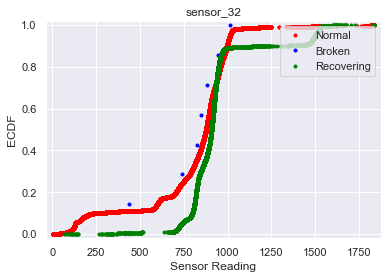

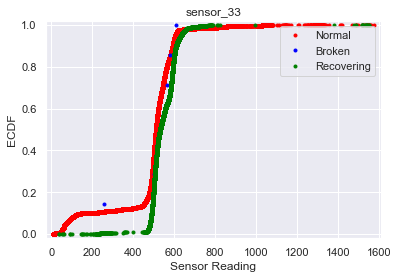

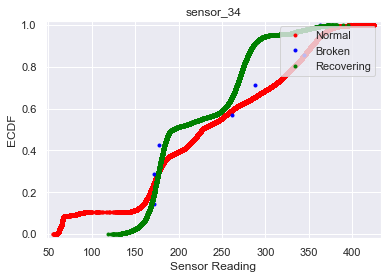

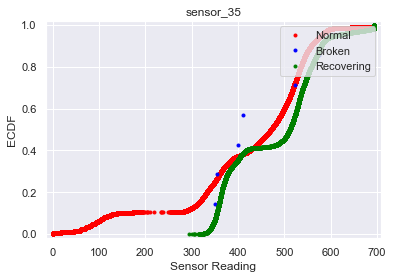

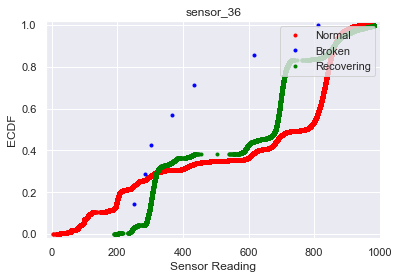

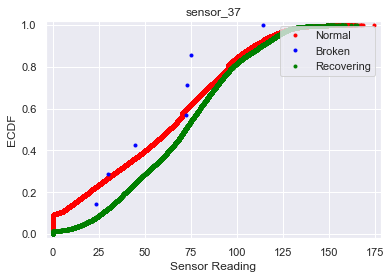

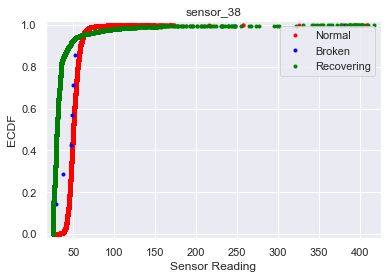

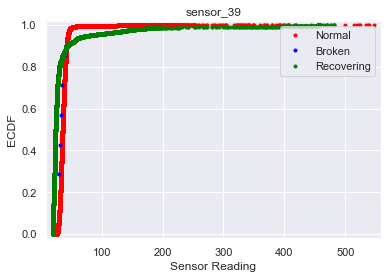

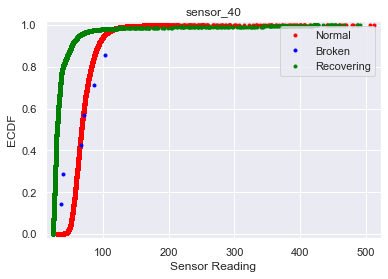

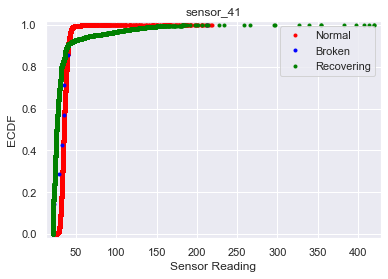

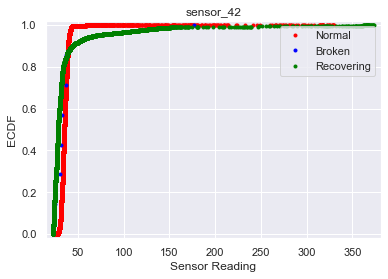

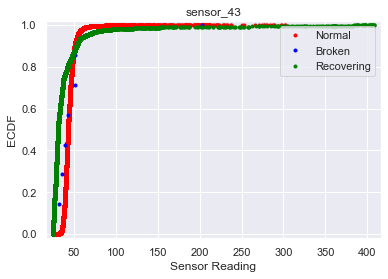

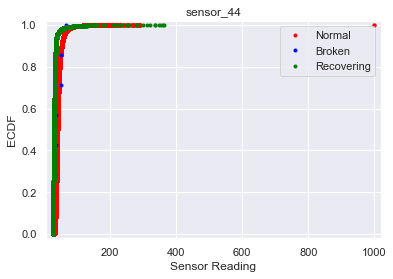

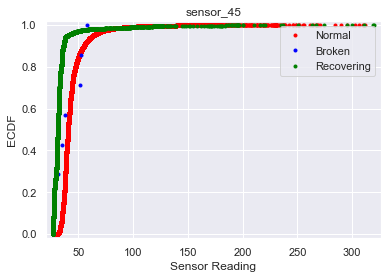

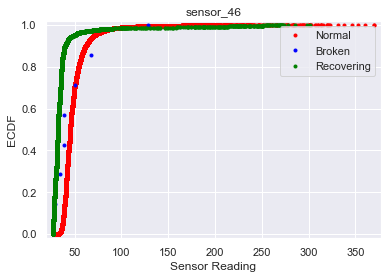

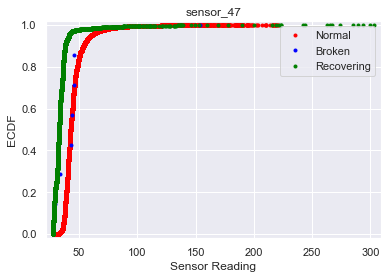

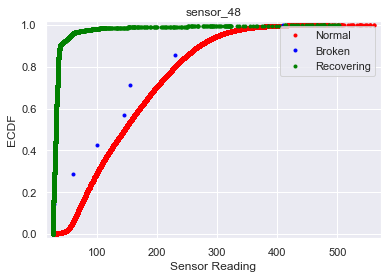

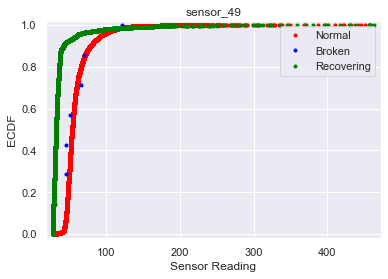

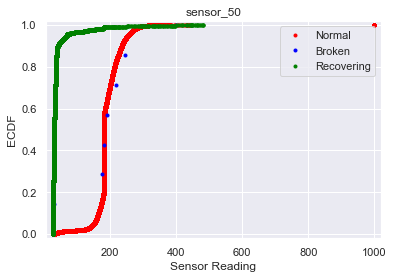

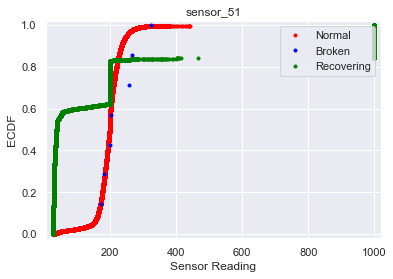

In [98]:
names=normal.drop('machine_status', axis=1).columns
for i, col in enumerate(names):
    x_norm, y_norm = ecdf(normal[col].values)
    x_broken, y_broken = ecdf(broken[col].values)
    x_rec, y_rec = ecdf(recovering[col].values)
    _=plt.plot(x_norm, y_norm, marker='.', color='red', linestyle='none', label='Normal')
    _=plt.plot(x_broken, y_broken, marker='.', color='blue', linestyle='none', label='Broken')
    _=plt.plot(x_rec, y_rec, marker='.', color='green', linestyle='none', label='Recovering')
    # Label the axes
    plt.xlabel('Sensor Reading')
    plt.ylabel('ECDF')
    plt.title(col)
    plt.legend(loc='upper right')
    plt.margins(0.02)
    # Display the plot
    plt.show()

<Figure size 432x288 with 0 Axes>

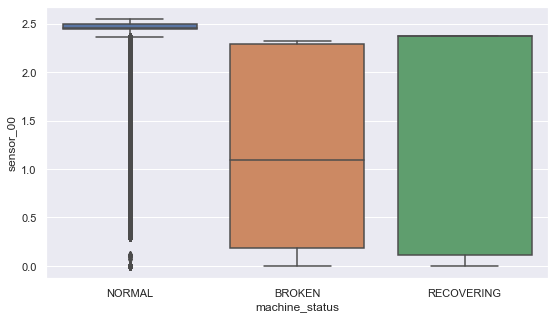

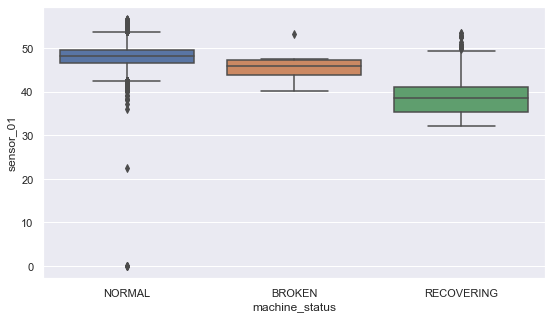

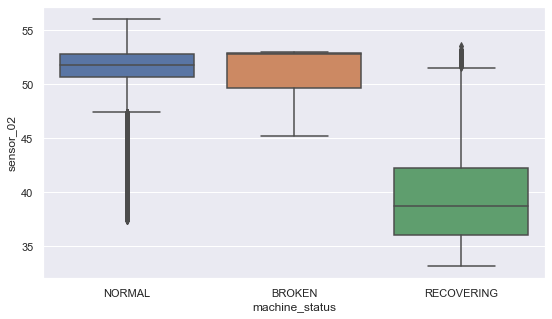

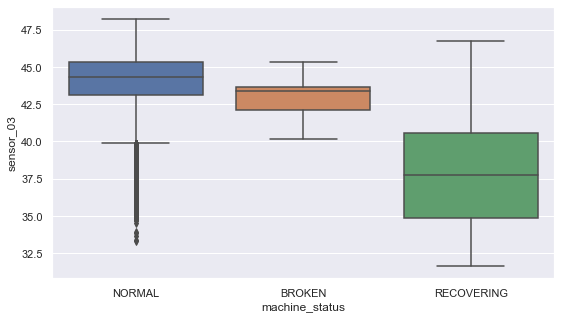

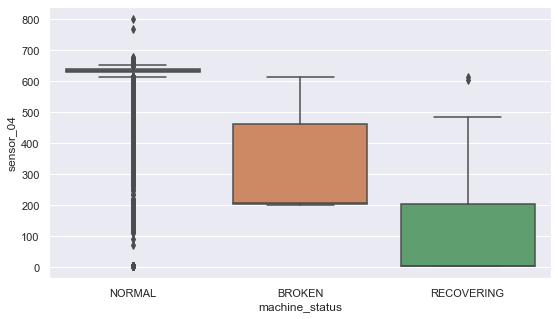

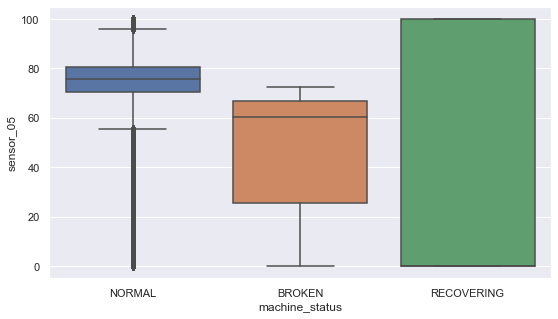

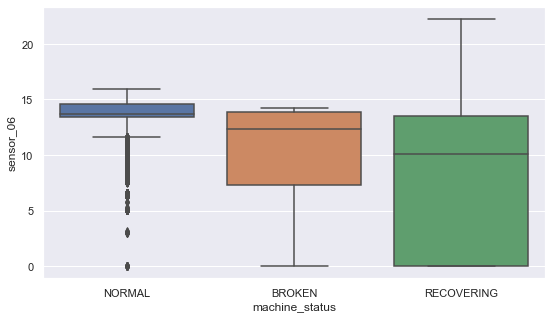

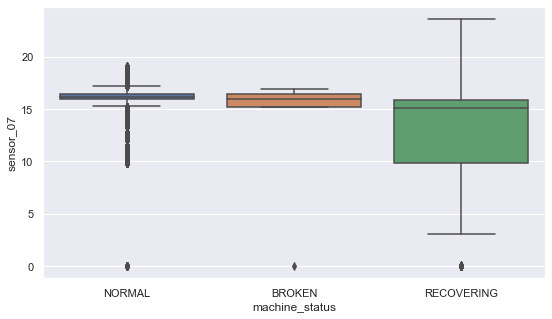

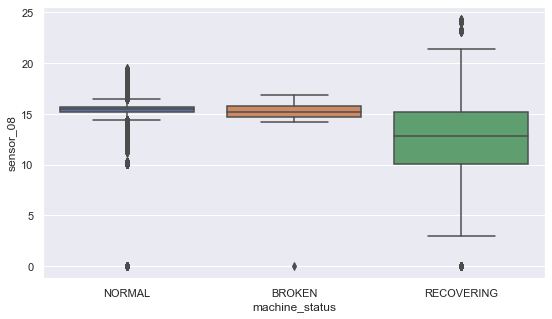

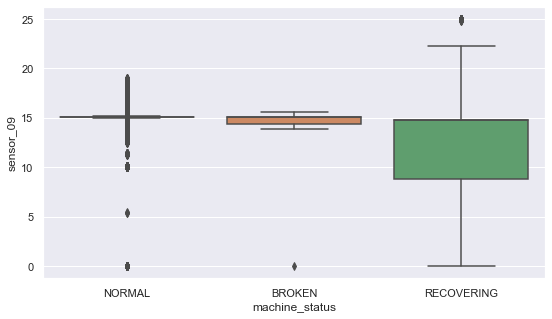

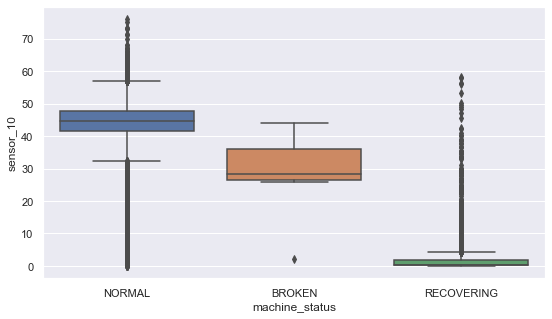

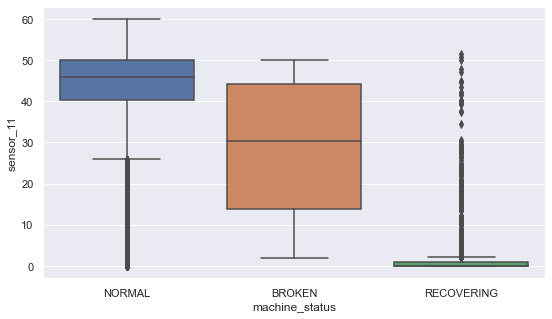

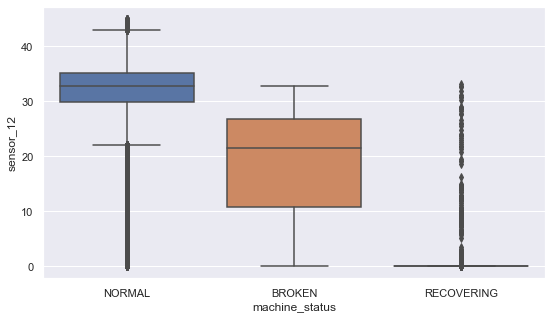

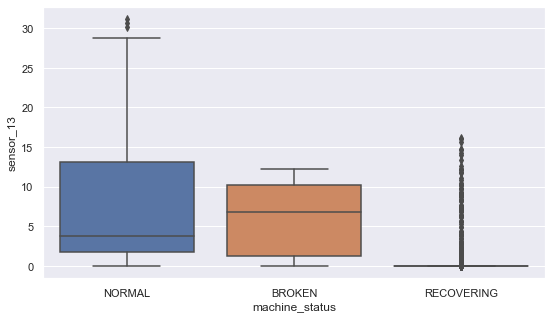

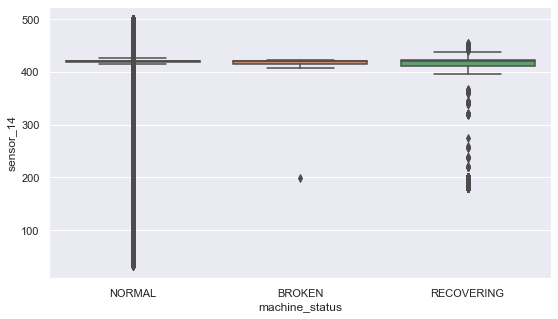

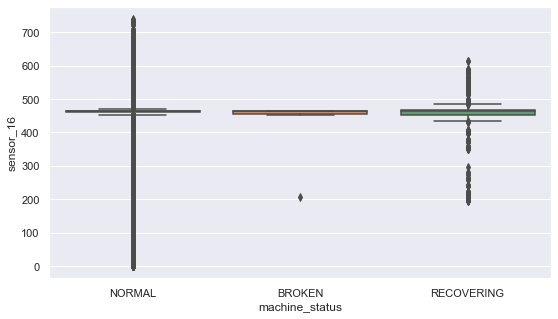

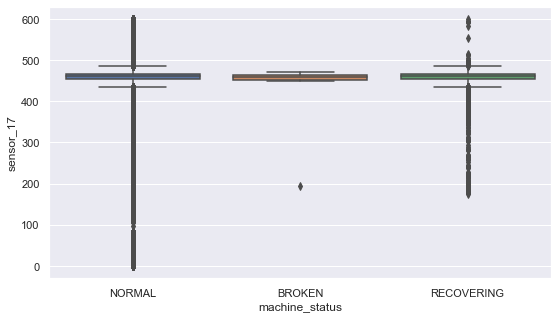

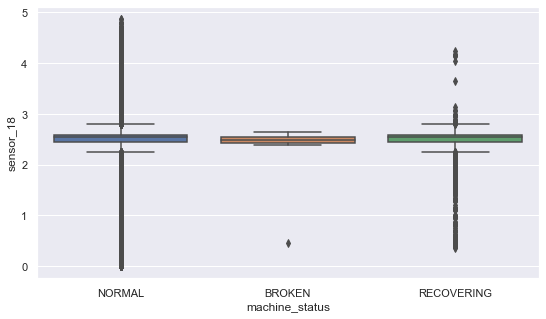

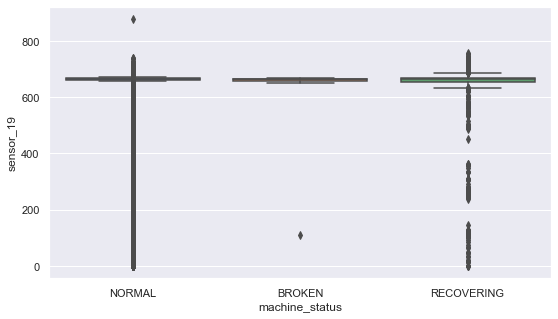

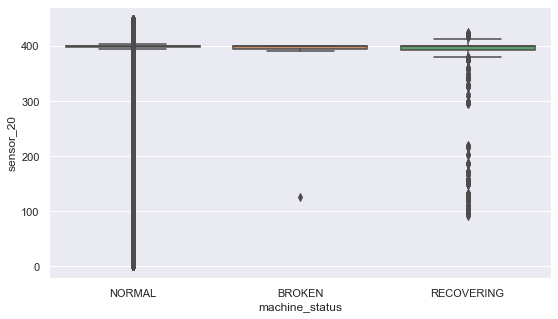

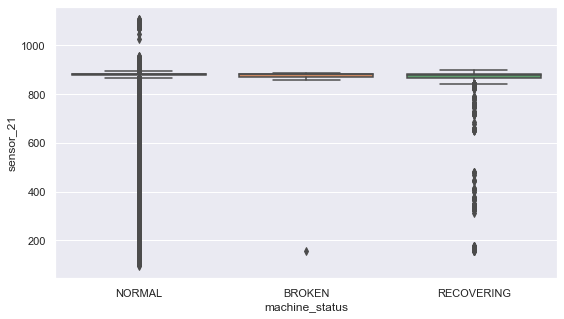

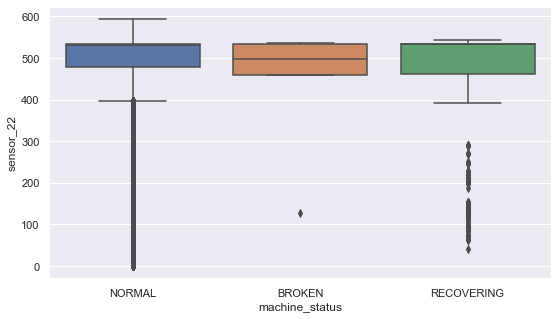

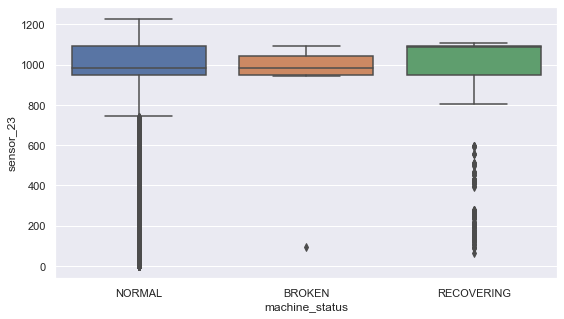

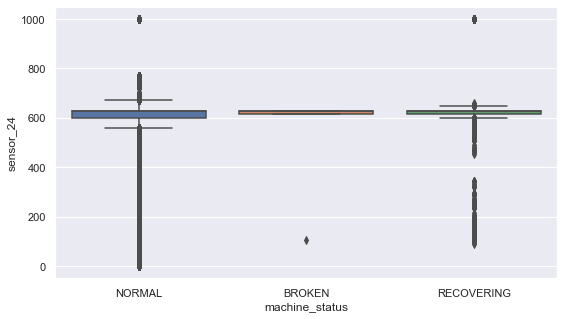

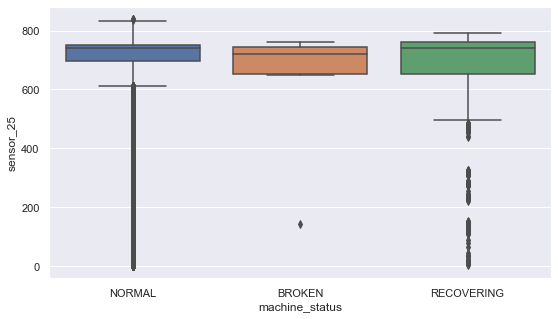

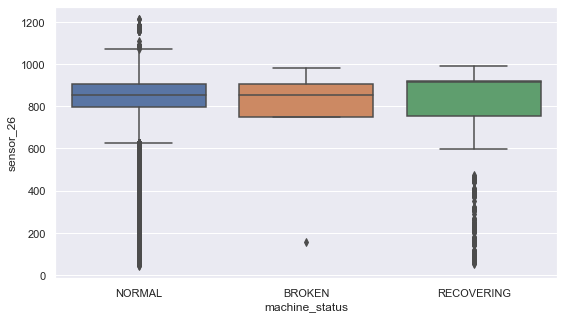

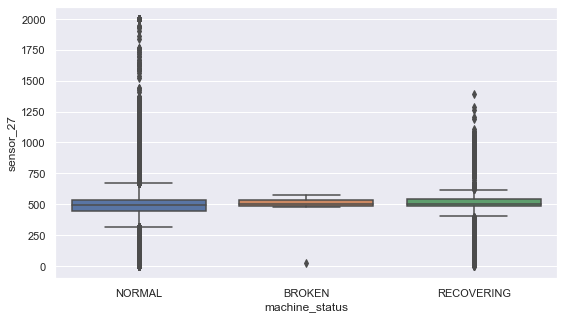

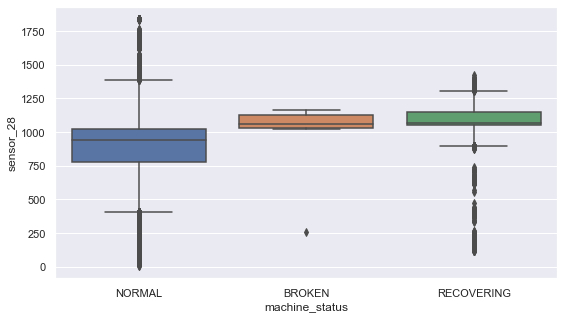

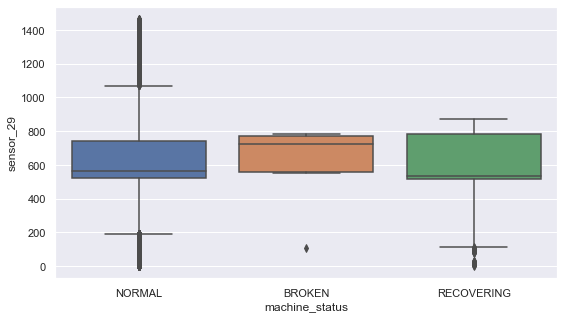

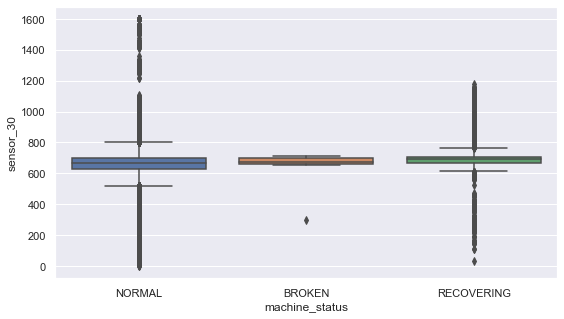

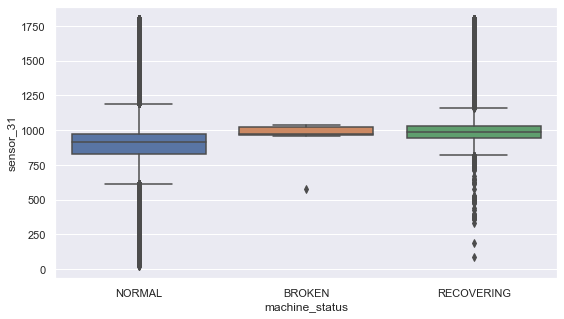

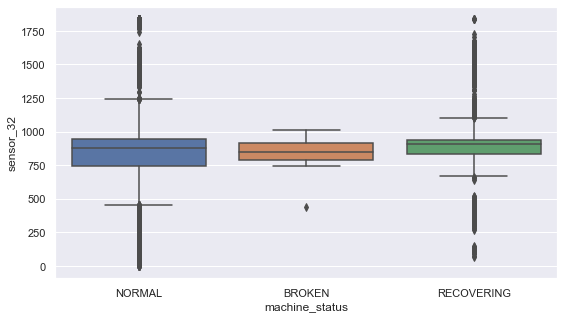

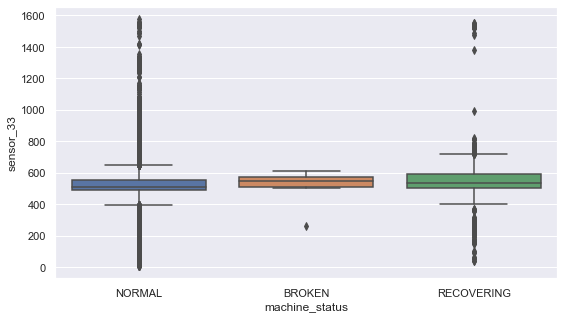

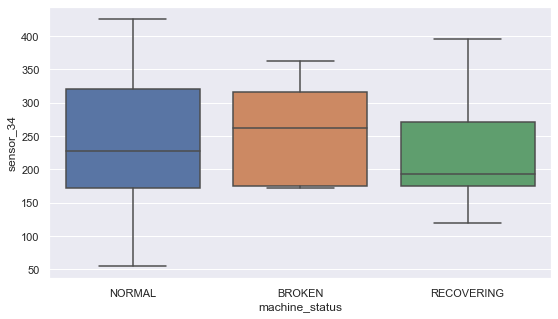

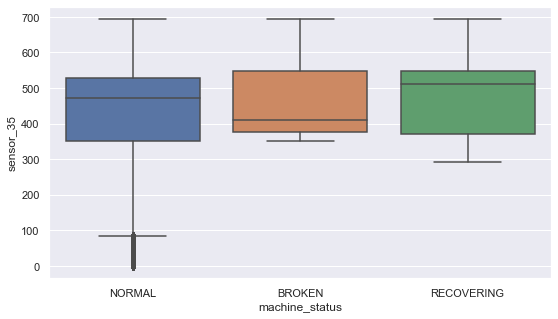

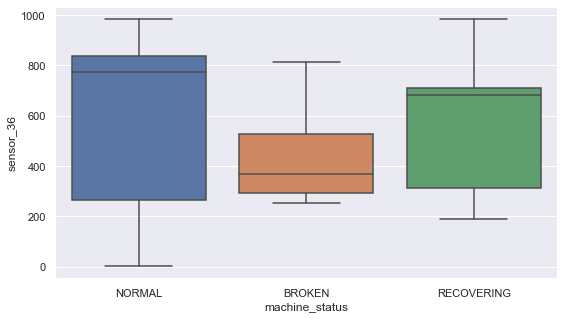

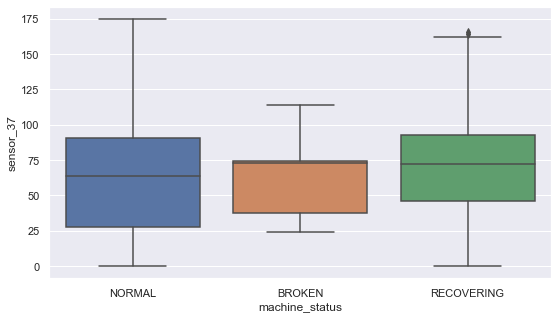

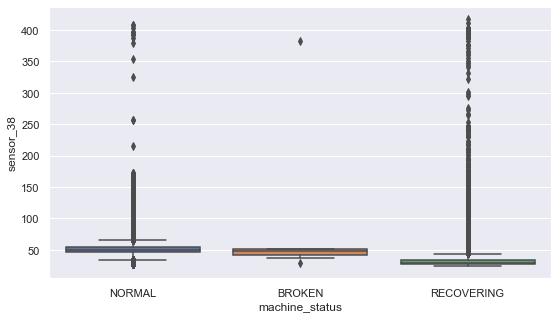

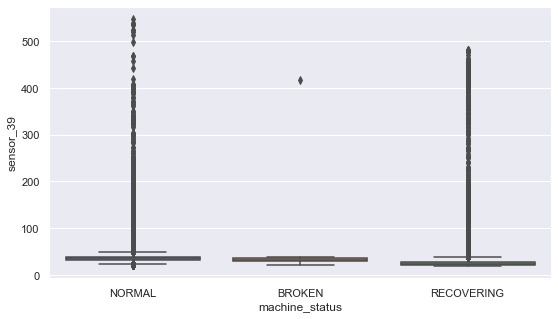

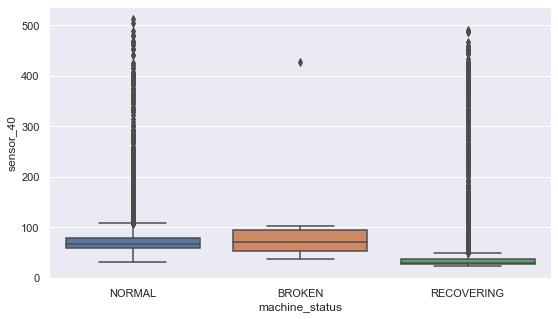

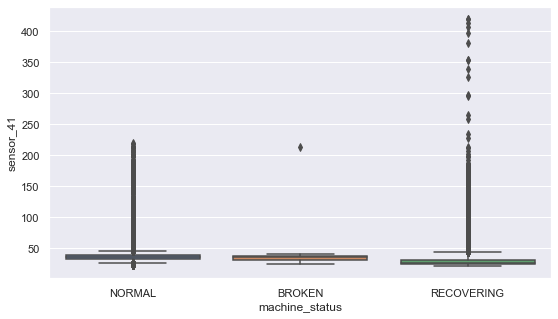

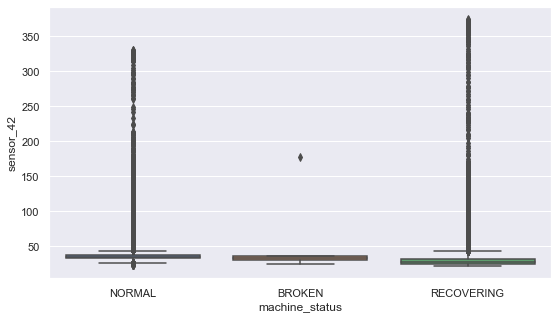

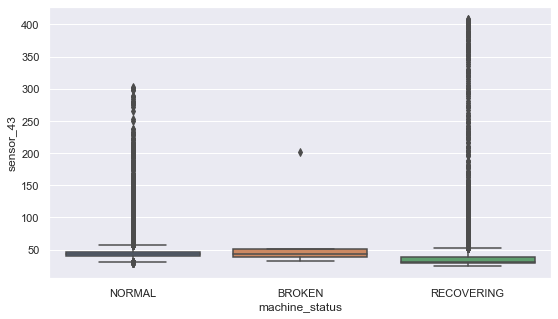

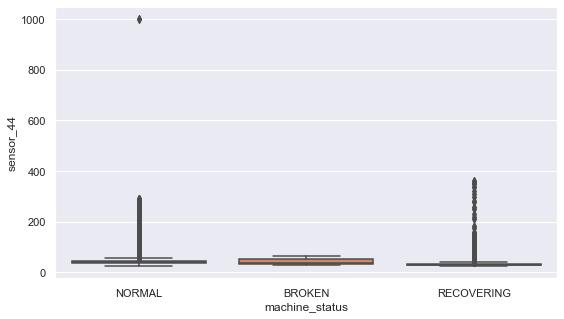

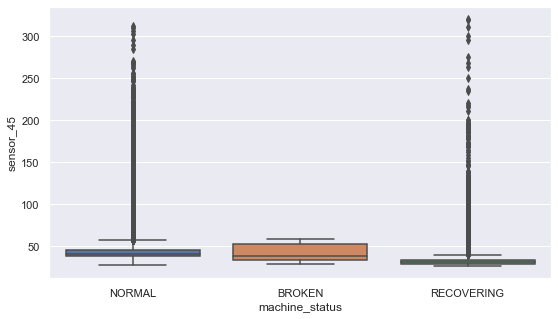

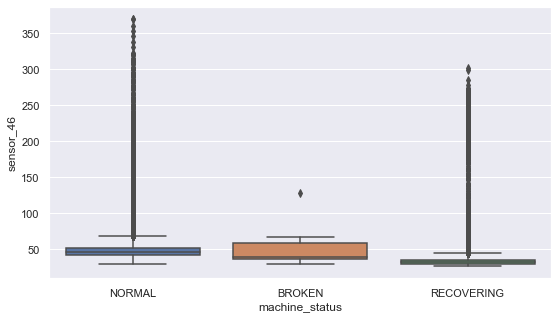

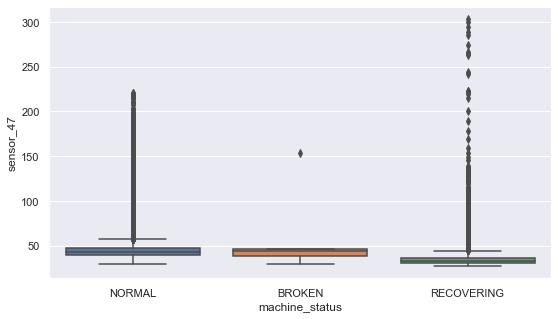

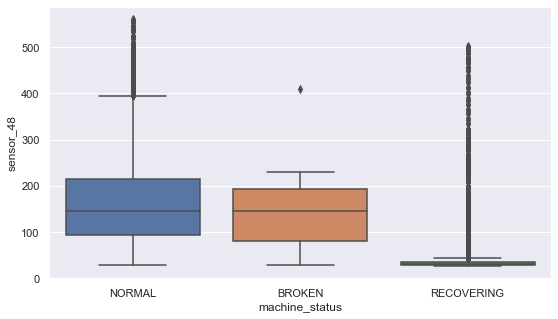

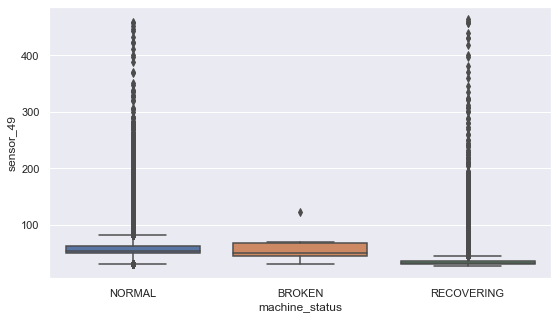

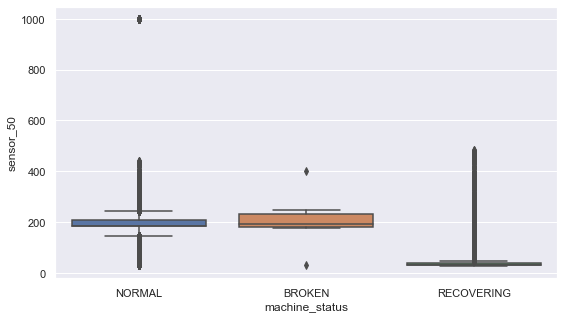

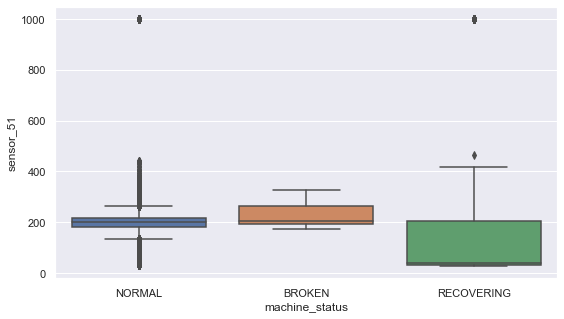

In [80]:
# Boxplot for each of the readings from the each sensor grouped by each of the different operating conditions of the pump
warnings.filterwarnings("ignore")
df_adj = df.drop('machine_status', 1)
for i, col in enumerate(df_adj.columns):
    plt.figure(i)
    plt.figure(figsize=(9,5))
    ax = sns.boxplot(x=df['machine_status'], y=df_adj[col])

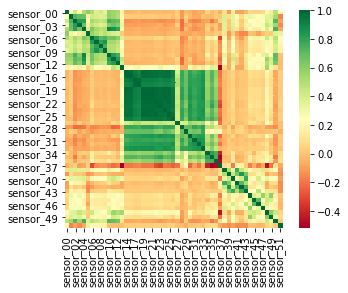

In [50]:
# Let's see a heatmap for correlation
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

## Step 4 Pre-processing and Training Data Development

#### 4.1:  Dummy Variable

#### 4.2:  Feature Scaling
The continuous variables in our dataset are at varying scales. For instance if you refer back to the histograms above you can see that the variable “sensor_00” ranges from 0 to 2.54, whilst “sensor_31” ranges from 24 to 1800. This poses a problem for many popular machine learning algorithms which often use Euclidian distance between data points to make the final predictions. Standardising the scale for all continuous variables can often result in an increase in performance of machine learning models.

Useful article about the topic: https://medium.com/vickdata/four-feature-types-and-how-to-transform-them-for-machine-learning-8693e1c24e80

#### 4.3:  Dimensionality Reduction with PCA

In [9]:
from sklearn.preprocessing import StandardScaler
# get the list of features
features=['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51']
# reset index
df_adj=df[df['machine_status']!='RECOVERING']
df_adj=df_adj.reset_index()
# seperate out the values of the features
x = df_adj.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 
                          'pca13', 'pca14', 'pca15'])

In [11]:
finalDf = pd.concat([principalDf, df_adj[['machine_status']]], axis = 1)

In [12]:
finalDf.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,machine_status
0,0.001546,-0.134449,-1.211501,0.033998,-3.098561,0.864177,-0.116618,-0.647557,-0.638972,0.587211,-0.590276,0.151065,0.614460,0.400934,0.979749,NORMAL
1,0.001546,-0.134449,-1.211501,0.033998,-3.098561,0.864177,-0.116618,-0.647557,-0.638972,0.587211,-0.590276,0.151065,0.614460,0.400934,0.979749,NORMAL
2,-0.143510,-0.093343,-1.222363,0.014379,-3.220677,0.914076,-0.145772,-0.518691,-0.631878,0.361998,-0.499091,0.047286,0.641840,0.240376,0.855701,NORMAL
3,-0.162685,-0.231544,-1.274194,0.196828,-3.107923,0.978349,-0.386434,-0.624633,-0.470655,0.333170,-0.543334,-0.008844,0.461773,0.325668,0.967054,NORMAL
4,-0.137665,-0.325388,-1.146494,0.328707,-3.046487,1.025857,-0.165524,-0.771646,-0.544373,0.374256,-0.570184,0.184628,0.669609,0.257669,0.924056,NORMAL


In [13]:
pca.explained_variance_ratio_

array([0.35210148, 0.12978194, 0.07513211, 0.06574587, 0.04551736,
       0.02899275, 0.02874201, 0.02701135, 0.02299357, 0.02048019,
       0.01948684, 0.01718155, 0.01672928, 0.01339374, 0.01149373])

In [14]:
finalDf.describe().T

,count,mean,std,min,25%,50%,75%,max
pca1,205074.0,-3.919104e-15,4.237601,-6.705044,-2.125639,-1.301323,-0.620200,13.107491
pca2,205074.0,-4.024591e-15,2.572724,-11.500749,-1.551569,-0.103105,1.182476,33.190690
pca3,205074.0,3.067374e-15,1.957487,-4.757730,-1.061068,-0.145443,0.832650,58.675591
pca4,205074.0,-8.000927e-15,1.831135,-18.159723,-0.985425,0.192268,1.144738,32.595081
pca5,205074.0,4.635441e-16,1.523613,-14.956165,-0.935531,0.184507,1.083901,17.337957
pca6,205074.0,-9.267867e-16,1.215992,-21.340079,-0.655947,0.018998,0.638674,22.768161
pca7,205074.0,1.287043e-15,1.210723,-11.292999,-0.532494,0.070383,0.645040,29.982712
pca8,205074.0,-1.075623e-15,1.173706,-17.197226,-0.598737,0.054590,0.675240,18.225159
pca9,205074.0,-1.840226e-16,1.082902,-4.705671,-0.695602,-0.052319,0.613501,21.433401
pca10,205074.0,2.861274e-16,1.022005,-9.091222,-0.525377,0.029113,0.562913,11.838122


## Step 5 Modeling

#### 5.1: KNN

In [33]:
# Prepare x and y - let's start with four features (sensors 04, 28, 31, 36) as per what was discovered from EDA
x=df[['sensor_04', 'sensor_28', 'sensor_31', 'sensor_36']]
y=df['machine_status']

In [36]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21, stratify=y)

In [37]:
len(x_train), len(x_test), len(y_train), len(y_test)

(153664, 65857, 153664, 65857)

In [40]:
# Train KNN on training set with k=6
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

In [45]:
# Let's see how the predicted values look like
y_pred

array(['NORMAL', 'NORMAL', 'NORMAL', ..., 'NORMAL', 'NORMAL', 'NORMAL'],
      dtype=object)

In [46]:
# Let's count the unique values from the prediction
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['NORMAL' 'RECOVERING']
 [61536 4321]]


In [47]:
# Let's count the unique values from the target test set
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['BROKEN' 'NORMAL' 'RECOVERING']
 [2 61521 4334]]


It appears the model could not predict the 2 broken states correctly.

In [41]:
# Calculate accuracy
knn.score(x_test, y_test)

0.9991041195317126

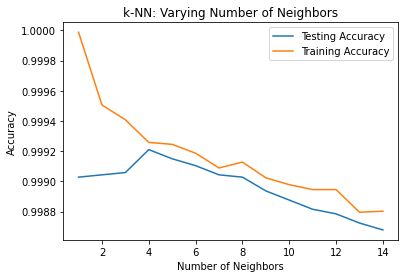

In [42]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Per the accuracy graph, 4 apears to be the most optimal number of neighbours. 

In [48]:
# Train KNN on training set with k=6
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

In [49]:
# Let's count the unique values from the prediction
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['NORMAL' 'RECOVERING']
 [61543 4314]]


Still cannot predict the broken states correctly. I suspect the sample size for the broken state is not enough as there only 7 observations in the broken state. But I will try different classifiers and see how it goes.